# Diabetes prediction 

The goal of this notebook is to elaborate and look into the causes for diabetes. Afterwards a model will be trained to see what are the main factors and it will try and predict what if a person has this health issues.

## Intoroduction

Welcome to this Jupyter Notebook! Our primary objective is to develop a predictive model for identifying the likelihood of diabetes in individuals. This comprehensive analysis will begin with an in-depth exploration of the domain to ensure a thorough understanding of diabetes and its associated risk factors. Following this, we will  examine and preprocess the dataset to extract meaningful insights and prepare it for modeling. By combining domain expertise with robust data analysis, we aim to achieve a reliable model that can assist in early diabetes detection and contribute to better health outcomes.

### Importing libraries

In [2]:
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("scikit-learn version:", sklearn.__version__) # 1.4.1
print("pandas version:", pd.__version__)            # 2.2.1
print("seaborn version:", sns.__version__)          # 0.13.2

scikit-learn version: 1.4.1.post1
pandas version: 2.2.2
seaborn version: 0.13.2


# **Phase 1**

## Domain Understanding

### 1. What is diabetes? 



Diabetes is a chronic medical condition where the body cannot properly regulate blood sugar levels. There are two main types: Type 1 diabetes, where the immune system attacks insulin-producing cells in the pancreas, and Type 2 diabetes, which develops when the body becomes resistant to insulin, or the pancreas cannot produce enough insulin. Both types require careful management to prevent serious health complications. (Diabetes Fonds, n.d.)
There are many possible complications that can occur if any type of diabetes is left untreated:

-	Type 1 diabetes complications – headaches, dry skin and mouth, stomach pain and without treatment – death [(Basina, 2022)](https://www.healthline.com/diabetesmine/ask-dmine-lifespan-sans-insulin)
-	Type 2 diabetes complications - kidney damage, eye damage, increased risk of hear disease or stroke [(UnityPoint Health, n.d.)](https://www.unitypoint.org/news-and-articles/untreated-diabetes-what-to-know)


By taking this into consideration, it is important to understand the urgency of an available quick evaluation on the possibility of diabetes. With a program where one can insert some of their medical data, which then can be quickly assessed, they can take measures in time and contact a doctor for an appropriate appointment.


### 2. How many people are affected by it?

As of 2021, over 537 million adults aged 20-79 were diagnosed with diabetes, representing one in every ten individuals. This number continues to grow, with projections estimating that by 2045, approximately 783 million people, or one in eight globally, will be affected. These statistics underscore the severity of the situation, highlighting that diabetes is a condition that can affect anyone.[(International Diabetes Assosiation, Diabetes Atlas)](https://diabetesatlas.org/)


### 3. Causes, risks and symptoms

There is not an exact specific reason considered for the development of diabetes, however there are multiple that are though as the main causes



#### 3.1 Risks and causes

- ***Genetics and Family History:*** Type 1 diabetes often requires inheriting risk factors from both parents, which are more prevalent among white populations with the highest incidence rates. While most individuals with these genetic predispositions do not develop diabetes, researchers are focused on identifying specific environmental triggers, such as cold weather. Both type 1 and type 2 diabetes share critical factors of genetic predisposition and environmental triggers [(About Diabetes, Genetics of Diabetes, n.d.)](https://diabetes.org/about-diabetes/genetics-diabetes).

- ***Age:*** The risk of type 2 diabetes significantly increases after the age of 35. Type 1 diabetes, however, can present at any age, with distinct peaks in children aged 4-7 years and 10-14 years.

- ***Inactivity and Obesity:*** Inactivity and excess weight are significant risk factors for diabetes. Obesity and a sedentary lifestyle further elevate susceptibility. Regular physical activity is crucial for weight management, glucose utilization, and improving cellular sensitivity to insulin.

- ***Family members*** - Sometimes family members of people with type 1 diabetes are tested for the presence of diabetes immune system cells (autoantibodies). If you have these autoantibodies, you have an increased risk of developing type 1 diabetes. But not everyone who has these autoantibodies develops diabetes.

- ***Ethnicity*** - Race or ethnicity can also increase the risk of developing type 2 diabetes. Although the reasons are not entirely understood, individuals who are Black, Hispanic, American Indian, or Asian American are at a higher risk.

#### 3.2 Symptoms 


•	Symptoms for type 1 diabetes include [(Mayo Clinic, Type 1 diabetes)](https://www.mayoclinic.org/diseases-conditions/type-1-diabetes/symptoms-causes/syc-20353011):

    o  Excessive thirst 
    o  Frequent urination
    o  Bed-wetting in children who previously did not wet the bed at night.
    o  Intense hunger
    o  Unintentional weight loss
    o  Irritability or mood changes
    o  Fatigue and weakness
    o  Blurry vision

•	Symptoms for type 2 diabetes include  [(Mayo Clinic, Type 2 diabetes)](https://www.mayoclinic.org/diseases-conditions/type-2-diabetes/symptoms-causes/syc-20351193): 

    o  Increased thirst
    o  Frequent urination
    o  Increased hunger
    o  Unintended weight loss
    o  Fatigue
    o  Blurred vision
    o  Slow-healing sores
    o  Frequent infections
    o  Numbness or tingling in the hands or feet.
    o  Areas of darkened skin, usually in the armpits and neck


### 4.Treatments

Considering the fact that diabetes is incurable might upset most people and even scare them, that does not mean that it is impossible to treat such a condition:



#### 4.1 Treatments for type 1 diabetes:
There are 4 possible types of insulin that could be taken so that an individual can live with diabetes:

[(Mayo Clinic, Type 1 diabetes)](https://www.mayoclinic.org/diseases-conditions/type-1-diabetes/diagnosis-treatment/drc-20353017)

- **Rapid-acting Insulin** - Starts working within 15 minutes of injection, peaks around 60 minutes, and remains active for about 4 hours. Typically administered 15 to 20 minutes before meals to control post-meal blood sugar spikes. Examples include glulisine (Apidra), lispro (Humalog, Admelog, Lyumjev), and aspart (Novolog, FiAsp).

- **Short-acting Insulin (Regular Insulin)** - Begins working approximately 30 minutes after injection, peaks between 90 to 120 minutes, and lasts about 4 to 6 hours. Examples include Humulin R, Novolin R, and Afrezza. It is often used to manage blood glucose levels during meals.

- **Intermediate-acting Insulin (NPH Insulin)** - Starts working within 1 to 3 hours, peaks between 6 to 8 hours, and lasts 12 to 24 hours. Examples include Novolin N and Humulin N. This insulin is suitable for maintaining basal insulin levels between meals and overnight.

- **Long- and Ultra- long acting insulin** - Provides coverage from 14 to 40 hours, offering a steady insulin level over an extended period and reducing the need for multiple daily injections. Examples include glargine (Lantus, Toujeo Solostar, Basaglar), detemir (Levemir), and degludec (Tresiba). These insulins maintain basal insulin needs throughout the day and night, providing greater flexibility and stability in managing blood glucose levels.




#### 4.2 Treatments for type 2 diabetes:
[(Mayo Clinic, Type 2 diabetes)](https://www.mayoclinic.org/diseases-conditions/type-2-diabetes/diagnosis-treatment/drc-20351199)

- **Healthy eating and a balanced diet** - While there is no specific diabetes diet, maintaining a balanced diet is crucial. Focus on regular meals, smaller portions, high-fiber foods, and healthy oils. Limit refined grains, starchy vegetables, sweets, and overall calorie intake. Consulting a registered dietitian can help plan balanced meals and monitor carbohydrate intake to stabilize blood sugar levels.

- **Physical activity** - Exercise is essential for weight management and blood sugar control. Engage in aerobic training for more than 30 minutes most days of the week and incorporate resistance training 2 to 3 times weekly.

- **Weight loss** - Losing even 5% of body weight can improve blood sugar, cholesterol, triglycerides, and blood pressure. Greater weight loss offers increased benefits, with up to 15% weight loss sometimes recommended. Consult your healthcare provider or dietitian to set appropriate goals and receive guidance on lifestyle changes.

- **Diabetes Medication** - If diet and exercise alone do not maintain target blood sugar levels, your healthcare provider may prescribe medications or recommend insulin therapy. Options for type 2 diabetes include Metformin, Sulfonylureas, Glinides, Thiazolidinediones, DPP-4 inhibitors, and GLP-1 receptor agonists.

### 5. Ways to monitor insulin

- Continuous glucose monitoring (CGM) - devices track blood sugar levels and are particularly effective in preventing hypoglycemia and lowering A1C. These monitors attach to the body with a fine needle just under the skin, providing glucose readings every few minutes.

- Closed loop system - A closed loop system links a continuous glucose monitor to an insulin pump, automatically adjusting insulin delivery based on blood sugar readings. The Food and Drug Administration has approved several hybrid systems for type 1 diabetes, which require some user input, such as reporting carbohydrate intake and confirming blood sugar levels. Fully autonomous closed loop systems are not yet available but are currently in clinical trials.

- Finger-Prick Blood Sugar Testing - A finger-prick test allows the user to regularly check their blood sugar levels, either at home or while on the go. This test indicates whether the blood sugar levels are too low, too high, or within the normal range. The test strip from the finger-prick is inserted into a device called a glucometer, which reads and displays the blood sugar level on a screen.[(MyWay Digital Health,2024)](https://www.knowdiabetes.org.uk/know-more/your-blood/blood-glucose/different-ways-to-monitor-blood-sugar-levels/)



### 6. Ways to deliver insulin 
[(Mayo Clinic, Type 1 diabetes)](https://www.mayoclinic.org/diseases-conditions/type-1-diabetes/diagnosis-treatment/drc-20353017)
- Injections - Insulin can be injected using a fine needle and syringe or an insulin pen. Insulin pens, resembling ink pens, are available in both disposable and refillable varieties. When opting for injections, a combination of different types of insulin is typically required for day and night use.

- Insulin Pump - An insulin pump is a small device worn externally, programmed to deliver specific amounts of insulin throughout the day and during meals. The device connects a reservoir of insulin to a catheter inserted under the skin of the abdomen. There is also a tubeless pump option, which involves wearing a pod containing the insulin on the body, with a small catheter inserted under the skin.


### 7. World Health Organization


When discussing worldwide treatment, it goes without a doubt that the World Health Organization (WHO), working as the directing and coordinating authority on international health within the United Nations system, adheres to the UN values of integrity, professionalism, and respect for diversity.

The values of the WHO workforce also reflect the principles of human rights, universality, and equity established in WHO’s Constitution, along with the ethical standards of the Organization. These values are inspired by WHO’s vision of a world in which all people attain the highest possible level of health and its mission to promote health, ensure global safety, and serve the vulnerable, with measurable impact at the country level. [(World Health Organization,Our Values, our DNA)](https://www.who.int/about/values)

The primary objective of effective health systems governance is to ensure that healthcare services are accessible, equitable, efficient, affordable, and of high quality for all individuals. Achieving this requires:
- **Efficient and Equitable Allocation of Resources:** Ensuring that healthcare resources are distributed in a manner that meets the needs of the entire population.

- **Policy and Regulatory Frameworks:** Developing and implementing policies and regulations to guide healthcare delivery

- **Monitoring and Evaluation:** Establishing mechanisms to monitor, evaluate, and review the performance of the healthcare system.


#### 7.1 AI and ethical principles

The World Health Organization has recognized artificial intelligence (AI) as a tool with the potential to significantly enhance the capabilities of health-care providers. AI can improve patient care, provide accurate diagnoses, optimize treatment plans, support pandemic preparedness and response, inform health policy decisions, and efficiently allocate resources within health systems. To fully realize this potential, health-care professionals and systems must have comprehensive information on the contexts in which AI can be safely and effectively utilized, the necessary conditions for its reliable and appropriate use, and the mechanisms for continuous auditing and performance assessment.

To mitigate the risks and maximize the benefits inherent in the use of artificial intelligence (AI) for health, the World Health Organization (WHO) outlines the following principles for AI regulation and governance: [(World Health Organization,2021)]( https://www.who.int/news/item/28-06-2021-who-issues-first-global-report-on-ai-in-health-and-six-guiding-principles-for-its-design-and-use)

- **Protecting Human Autonomy**: In health care, humans must retain control over health-care systems and medical decisions. Privacy and confidentiality should be safeguarded, and patients must provide valid informed consent through appropriate legal frameworks for data protection.

- **Promoting Human Well-Being, Safety, and the Public Interest**: AI technologies must meet regulatory standards for safety, accuracy, and efficacy for specific use cases or indications. Quality control measures and mechanisms for quality improvement in AI use must be established.

- **Ensuring Transparency, Explainability, and Intelligibility**: Transparency requires the publication or documentation of sufficient information before designing or deploying an AI technology. This information must be easily accessible and support meaningful public consultation and debate on the technology's design and appropriate use.

- **Fostering Responsibility and Accountability**: Stakeholders are responsible for ensuring AI technologies are used under suitable conditions and by adequately trained personnel. Effective mechanisms for questioning and redress must be available for individuals and groups adversely affected by algorithm-based decisions.

- **Ensuring Inclusiveness and Equity**: AI for health should be designed to promote equitable use and access across all demographics, regardless of age, sex, gender, income, race, ethnicity, sexual orientation, ability, or other characteristics protected under human rights codes.

- **Promoting Responsiveness and Sustainability**: AI applications should be continuously and transparently assessed during actual use to ensure they meet expectations and requirements. AI systems must be designed to minimize environmental impact and enhance energy efficiency. Governments and companies should address anticipated workplace disruptions, including training health-care workers to adapt to AI systems and managing potential job losses due to automation.




___

## ***More information about the topics***

If you want to know more things about:

- History and past treatments of diabetes
- Hleathcare systems


as well as go into more details about the previously discussed topics, with the bibliography of all the sources used for the research of the project, feel free to read more about them in the project proposal which has been attached to this notebook withing the submission!

___

# **Phase 2**

## Data Requirments


To achieve such a system, we will need different kinds of mostly medical data, related to the person. Not only that be we would probably need some kind of lifestyle data since it is something that should be taken into consideration, when trying to predict something of this sort. General data would also be nice, something like the gender and age as an example to start with. The BMI also could also be useful since it can be affected by/affect diabetes. Sport activities may be somehow related, since there is research that shows that people who do more physical activity are less likely to develop the illness. Also, blood sugar levels should be of great help when it comes to determining the possibly of development.
-	Age – Number
-	Gender – Male or Female – 0/1
-	BMI – Number
-	Smoking – yes/no – 1/0
-	Activity – yes/No – 1/0
-	Blood Sugat Levels - Number


## Data Collection

After looking around into different possible sources, I have decided to work on this dataset from Kaggle:

https://www.kaggle.com/datasets/rabieelkharoua/diabetes-health-dataset-analysis/data

It seems like it contains a lot of vital data for such a project and it also contains some of the features which were mentioned earlier

### Let us have a deeper look into what we are working with

In [3]:
whole_data = pd.read_csv('dataset/diabetes_data.csv')


In [4]:
whole_data.shape

(1879, 46)

In [5]:
whole_data.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'SocioeconomicStatus',
       'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption',
       'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryDiabetes', 'GestationalDiabetes',
       'PolycysticOvarySyndrome', 'PreviousPreDiabetes', 'Hypertension',
       'SystolicBP', 'DiastolicBP', 'FastingBloodSugar', 'HbA1c',
       'SerumCreatinine', 'BUNLevels', 'CholesterolTotal', 'CholesterolLDL',
       'CholesterolHDL', 'CholesterolTriglycerides',
       'AntihypertensiveMedications', 'Statins', 'AntidiabeticMedications',
       'FrequentUrination', 'ExcessiveThirst', 'UnexplainedWeightLoss',
       'FatigueLevels', 'BlurredVision', 'SlowHealingSores',
       'TinglingHandsFeet', 'QualityOfLifeScore', 'HeavyMetalsExposure',
       'OccupationalExposureChemicals', 'WaterQuality',
       'MedicalCheckupsFrequency', 'MedicationAdherence', 'HealthLiteracy',
       'Diagnosis', 'DoctorInCharge'],
      dtype='object')

To make it easier to read


In [6]:
for column in whole_data.columns:
    print(column)

PatientID
Age
Gender
Ethnicity
SocioeconomicStatus
EducationLevel
BMI
Smoking
AlcoholConsumption
PhysicalActivity
DietQuality
SleepQuality
FamilyHistoryDiabetes
GestationalDiabetes
PolycysticOvarySyndrome
PreviousPreDiabetes
Hypertension
SystolicBP
DiastolicBP
FastingBloodSugar
HbA1c
SerumCreatinine
BUNLevels
CholesterolTotal
CholesterolLDL
CholesterolHDL
CholesterolTriglycerides
AntihypertensiveMedications
Statins
AntidiabeticMedications
FrequentUrination
ExcessiveThirst
UnexplainedWeightLoss
FatigueLevels
BlurredVision
SlowHealingSores
TinglingHandsFeet
QualityOfLifeScore
HeavyMetalsExposure
OccupationalExposureChemicals
WaterQuality
MedicalCheckupsFrequency
MedicationAdherence
HealthLiteracy
Diagnosis
DoctorInCharge


In [7]:
whole_data.head()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,6000,44,0,1,2,1,32.985284,1,4.499365,2.443385,...,1,73.765109,0,0,0,1.782724,4.486980,7.211349,1,Confidential
1,6001,51,1,0,1,2,39.916764,0,1.578919,8.301264,...,0,91.445753,0,0,1,3.381070,5.961705,5.024612,1,Confidential
2,6002,89,1,0,1,3,19.782251,0,1.177301,6.103395,...,0,54.485744,0,0,0,2.701019,8.950821,7.034944,0,Confidential
3,6003,21,1,1,1,2,32.376881,1,1.714621,8.645465,...,0,77.866758,0,0,1,1.409056,3.124769,4.717774,0,Confidential
4,6004,27,1,0,1,3,16.808600,0,15.462549,4.629383,...,0,37.731808,0,0,0,1.218452,6.977741,7.887940,0,Confidential


After having a quick look into the `head` of the dataset, it seems like there is only one value for `DoctorInCharge` - *Confidential*. This is understandable since they are trying to keep the confidetiality of the people involved so it would probably be a good idea to drop it

In [8]:
whole_data = whole_data.drop(columns=['DoctorInCharge'])

In [9]:
whole_data.isna().sum()

PatientID                        0
Age                              0
Gender                           0
Ethnicity                        0
SocioeconomicStatus              0
EducationLevel                   0
BMI                              0
Smoking                          0
AlcoholConsumption               0
PhysicalActivity                 0
DietQuality                      0
SleepQuality                     0
FamilyHistoryDiabetes            0
GestationalDiabetes              0
PolycysticOvarySyndrome          0
PreviousPreDiabetes              0
Hypertension                     0
SystolicBP                       0
DiastolicBP                      0
FastingBloodSugar                0
HbA1c                            0
SerumCreatinine                  0
BUNLevels                        0
CholesterolTotal                 0
CholesterolLDL                   0
CholesterolHDL                   0
CholesterolTriglycerides         0
AntihypertensiveMedications      0
Statins             

It does also seem like the whole dataset does not have missing values which is useful, however I do believe we should keep an eye out for the possible problems in the future

In [10]:
for col in whole_data.columns:
    print(f"Column '{col}' has {whole_data[col].nunique()} unique values.")

Column 'PatientID' has 1879 unique values.
Column 'Age' has 71 unique values.
Column 'Gender' has 2 unique values.
Column 'Ethnicity' has 4 unique values.
Column 'SocioeconomicStatus' has 3 unique values.
Column 'EducationLevel' has 4 unique values.
Column 'BMI' has 1879 unique values.
Column 'Smoking' has 2 unique values.
Column 'AlcoholConsumption' has 1879 unique values.
Column 'PhysicalActivity' has 1879 unique values.
Column 'DietQuality' has 1879 unique values.
Column 'SleepQuality' has 1879 unique values.
Column 'FamilyHistoryDiabetes' has 2 unique values.
Column 'GestationalDiabetes' has 2 unique values.
Column 'PolycysticOvarySyndrome' has 2 unique values.
Column 'PreviousPreDiabetes' has 2 unique values.
Column 'Hypertension' has 2 unique values.
Column 'SystolicBP' has 90 unique values.
Column 'DiastolicBP' has 60 unique values.
Column 'FastingBloodSugar' has 1879 unique values.
Column 'HbA1c' has 1879 unique values.
Column 'SerumCreatinine' has 1879 unique values.
Column 'B

In [11]:
whole_data.head()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,SlowHealingSores,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
0,6000,44,0,1,2,1,32.985284,1,4.499365,2.443385,...,0,1,73.765109,0,0,0,1.782724,4.486980,7.211349,1
1,6001,51,1,0,1,2,39.916764,0,1.578919,8.301264,...,0,0,91.445753,0,0,1,3.381070,5.961705,5.024612,1
2,6002,89,1,0,1,3,19.782251,0,1.177301,6.103395,...,0,0,54.485744,0,0,0,2.701019,8.950821,7.034944,0
3,6003,21,1,1,1,2,32.376881,1,1.714621,8.645465,...,0,0,77.866758,0,0,1,1.409056,3.124769,4.717774,0
4,6004,27,1,0,1,3,16.808600,0,15.462549,4.629383,...,0,0,37.731808,0,0,0,1.218452,6.977741,7.887940,0


There are too many columns to work with, so we will probably create multiple smaller datasets with the different valeues. Also, it would probably be a good idea to keep the whole dataset as well, just in case we may need it.

In [12]:
whole_data.describe()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,SlowHealingSores,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
count,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,...,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000
mean,6939.000000,55.043108,0.487493,0.755721,0.992017,1.699308,27.687601,0.281533,10.096587,5.200790,...,0.102714,0.111229,48.508643,0.052155,0.103246,0.200639,1.997101,4.957539,5.011736,0.400213
std,542.564896,20.515839,0.499977,1.047558,0.764940,0.885665,7.190975,0.449866,5.914216,2.857012,...,0.303666,0.314500,28.758488,0.222400,0.304361,0.400585,1.122632,2.910934,2.920908,0.490072
min,6000.000000,20.000000,0.000000,0.000000,0.000000,0.000000,15.025898,0.000000,0.000928,0.004089,...,0.000000,0.000000,0.002390,0.000000,0.000000,0.000000,0.004013,0.005384,0.000362,0.000000
25%,6469.500000,38.000000,0.000000,0.000000,0.000000,1.000000,21.469981,0.000000,4.789725,2.751022,...,0.000000,0.000000,23.974098,0.000000,0.000000,0.000000,1.057801,2.420024,2.410113,0.000000
50%,6939.000000,55.000000,0.000000,0.000000,1.000000,2.000000,27.722988,0.000000,10.173865,5.249002,...,0.000000,0.000000,47.519693,0.000000,0.000000,0.000000,1.987170,4.843886,5.035208,0.000000
75%,7408.500000,73.000000,1.000000,1.000000,2.000000,2.000000,33.856460,1.000000,15.285359,7.671402,...,0.000000,0.000000,72.883179,0.000000,0.000000,0.000000,2.946019,7.513933,7.586865,1.000000
max,7878.000000,90.000000,1.000000,3.000000,2.000000,3.000000,39.998811,1.000000,19.996231,9.993893,...,1.000000,1.000000,99.788530,1.000000,1.000000,1.000000,3.999715,9.997165,9.993029,1.000000


In [13]:
demographic_details_data = whole_data[['PatientID', 'Age', 'Gender', 'Ethnicity', 'SocioeconomicStatus', 'EducationLevel','Diagnosis']]
print(demographic_details_data.shape)
demographic_details_data.head()

(1879, 7)


,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,Diagnosis
0,6000,44,0,1,2,1,1
1,6001,51,1,0,1,2,1
2,6002,89,1,0,1,3,0
3,6003,21,1,1,1,2,0
4,6004,27,1,0,1,3,0


In [14]:
lifestyle_data = whole_data[['PatientID', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality','Diagnosis']]
print(lifestyle_data.shape)
lifestyle_data.head()

(1879, 8)


,PatientID,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,Diagnosis
0,6000,32.985284,1,4.499365,2.443385,4.898831,4.049885,1
1,6001,39.916764,0,1.578919,8.301264,8.941093,7.508150,1
2,6002,19.782251,0,1.177301,6.103395,7.722543,7.708387,0
3,6003,32.376881,1,1.714621,8.645465,4.804044,6.286548,0
4,6004,16.808600,0,15.462549,4.629383,2.532756,9.771125,0


In [15]:
medical_history_data = whole_data[['PatientID', 'FamilyHistoryDiabetes', 'GestationalDiabetes', 'PolycysticOvarySyndrome', 'PreviousPreDiabetes', 'Hypertension','Diagnosis']]
print(medical_history_data.shape)
medical_history_data.head()

(1879, 7)


,PatientID,FamilyHistoryDiabetes,GestationalDiabetes,PolycysticOvarySyndrome,PreviousPreDiabetes,Hypertension,Diagnosis
0,6000,1,1,0,0,0,1
1,6001,0,0,0,0,0,1
2,6002,1,0,0,0,0,0
3,6003,1,1,0,1,0,0
4,6004,0,0,0,0,0,0


In [16]:
clinical_measurements_data = whole_data[['PatientID', 'SystolicBP', 'DiastolicBP', 'FastingBloodSugar', 'HbA1c', 'SerumCreatinine', 'BUNLevels', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides','Diagnosis']]
print(clinical_measurements_data.shape)
clinical_measurements_data.head()

(1879, 12)


,PatientID,SystolicBP,DiastolicBP,FastingBloodSugar,HbA1c,SerumCreatinine,BUNLevels,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,Diagnosis
0,6000,93,73,163.687162,9.283631,2.665607,28.190147,254.270670,86.993627,70.801469,190.335834,1
1,6001,165,99,188.347070,7.326870,4.172177,32.149491,155.358831,110.056105,39.900112,81.172469,1
2,6002,119,91,127.703653,4.083426,1.973168,10.018375,231.608922,62.035793,62.480666,279.809069,0
3,6003,169,87,82.688415,6.516645,3.057797,44.123281,176.592374,68.238410,46.977819,112.751396,0
4,6004,165,69,90.743395,5.607222,4.150353,7.757117,157.344121,66.476215,40.059755,381.528785,0


In [17]:
medications_data = whole_data[['PatientID', 'AntihypertensiveMedications', 'Statins', 'AntidiabeticMedications','Diagnosis']]
print(medications_data.shape)
medications_data.head()



(1879, 5)


,PatientID,AntihypertensiveMedications,Statins,AntidiabeticMedications,Diagnosis
0,6000,0,0,1,1
1,6001,0,0,0,1
2,6002,1,1,0,0
3,6003,0,0,1,0
4,6004,1,1,0,0


In [18]:
qol_symptoms_data = whole_data[['PatientID', 'FrequentUrination','ExcessiveThirst','UnexplainedWeightLoss','FatigueLevels','BlurredVision','SlowHealingSores','TinglingHandsFeet','QualityOfLifeScore','Diagnosis']]
print(qol_symptoms_data.shape)
qol_symptoms_data.head()



(1879, 10)


,PatientID,FrequentUrination,ExcessiveThirst,UnexplainedWeightLoss,FatigueLevels,BlurredVision,SlowHealingSores,TinglingHandsFeet,QualityOfLifeScore,Diagnosis
0,6000,0,0,0,9.534169,0,0,1,73.765109,1
1,6001,0,0,0,0.123214,0,0,0,91.445753,1
2,6002,0,0,0,9.643320,0,0,0,54.485744,0
3,6003,0,0,0,3.403557,0,0,0,77.866758,0
4,6004,0,0,0,2.924687,0,0,0,37.731808,0


In [19]:
env_occupational_data = whole_data[['PatientID', 'HeavyMetalsExposure','OccupationalExposureChemicals','WaterQuality','Diagnosis']]
print(env_occupational_data.shape)
env_occupational_data.head()



(1879, 5)


,PatientID,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,Diagnosis
0,6000,0,0,0,1
1,6001,0,0,1,1
2,6002,0,0,0,0
3,6003,0,0,1,0
4,6004,0,0,0,0


In [20]:
health_behaviors_data = whole_data[['PatientID', 'MedicalCheckupsFrequency','MedicationAdherence','HealthLiteracy','Diagnosis']]
print(health_behaviors_data.shape)
health_behaviors_data.head()



(1879, 5)


,PatientID,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
0,6000,1.782724,4.486980,7.211349,1
1,6001,3.381070,5.961705,5.024612,1
2,6002,2.701019,8.950821,7.034944,0
3,6003,1.409056,3.124769,4.717774,0
4,6004,1.218452,6.977741,7.887940,0


Currenlty we made multiple tables, with the main one which contain the different kinds of data for the patients, in a way which is easier to understand and use. They can be connected once again into bigger sets with the use of the patient ID column, which can be used as a foreign key

## Data Understanding and data dictionary


Here are the names of the tables we are currently working with as well as their shapes represented as rows and columns (r/c):

  - ` whole_data - (1879, 44)`
  - `demographic_details_data -(1879, 7)`
  - `lifestyle_data - (1879, 7)`
  - `medical_history_data - (1879, 6)`
  - `clinical_measurements_data - (1879, 11)`
  - `medications_data - (1879, 4)`
  - `qol_symptoms_data - (1879, 9)`
  - `env_occupational_data - (1879, 4)`
  - `health_behaviors_data - (1879, 4)`



I do believe that all of this data one way or another is connected to diabetes, however I also have a small speculation that looking into the features which we found important from our ***Domain Understanding (DU)*** will be the most dominant. Based on that, I will have my attention probably mostly on them, but that does not mean that the subsets will not be looked at individualy, one way or another


### *Dictionary and values*

Patient ID
- PatientID: A unique identifier assigned to each patient (6000 to 7878).

Diagnosis Information (Target Variable)
- Diagnosis: Diagnosis status for Diabetes, where 0 indicates No and 1 indicates Yes.

The `whole_data` dictionary contains all of the sub datasets mentioned in here

___



<u>***Demographic Details***</u>

-	Age: The age of the patients ranges from 20 to 90 years.
-	Gender: Gender of the patients, where 0 represents Male and 1 represents Female.
-	Ethnicity: The ethnicity of the patients, coded as follows:

        - 0: Caucasian
        - 1: African American
        - 2: Asian
        - 3: Other
        
-	SocioeconomicStatus: The socioeconomic status of the patients, coded as follows:

        0: Low
        1: Middle
        2: High
        
-	EducationLevel: The education level of the patients, coded as follows:

        0: None
        1: High School
        2: Bachelor's
        3: Higher


<u>***Lifestyle Factors***</u>

- BMI: Body Mass Index of the patients, ranging from 15 to 40.
- Smoking: Smoking status, where 0 indicates No and 1 indicates Yes.
- AlcoholConsumption: Weekly alcohol consumption in units, ranging from 0 to 20.
- PhysicalActivity: Weekly physical activity in hours, ranging from 0 to 10.
- DietQuality: Diet quality score, ranging from 0 to 10.
- SleepQuality: Sleep quality score, ranging from 4 to 10.

<u>***Medical History***</u>

- FamilyHistoryDiabetes: Family history of diabetes, where 0 indicates No and 1 indicates Yes.
- GestationalDiabetes: History of gestational diabetes, where 0 indicates No and 1 indicates Yes.
- PolycysticOvarySyndrome: Presence of polycystic ovary syndrome, where 0 indicates No and 1 indicates Yes.
- PreviousPreDiabetes: History of previous pre-diabetes, where 0 indicates No and 1 indicates Yes.
- Hypertension: Presence of hypertension, where 0 indicates No and 1 indicates Yes.

<u>***Clinical Measurements***</u>
- SystolicBP: Systolic blood pressure, ranging from 90 to 180 mmHg.
- DiastolicBP: Diastolic blood pressure, ranging from 60 to 120 mmHg.
- FastingBloodSugar: Fasting blood sugar levels, ranging from 70 to 200 mg/dL.
- HbA1c: Hemoglobin A1c levels, ranging from 4.0% to 10.0%.
- SerumCreatinine: Serum creatinine levels, ranging from 0.5 to 5.0 mg/dL.
- BUNLevels: Blood Urea Nitrogen levels, ranging from 5 to 50 mg/dL.
- CholesterolTotal: Total cholesterol levels, ranging from 150 to 300 mg/dL.
- CholesterolLDL: Low-density lipoprotein cholesterol levels, ranging from 50 to 200 mg/dL.
- CholesterolHDL: High-density lipoprotein cholesterol levels, ranging from 20 to 100 mg/dL.
- CholesterolTriglycerides: Triglycerides levels, ranging from 50 to 400 mg/dL.

<u>***Medications***</u>
- AntihypertensiveMedications: Use of antihypertensive medications, where 0 indicates No and 1 indicates Yes.
- Statins: Use of statins, where 0 indicates No and 1 indicates Yes.
- AntidiabeticMedications: Use of antidiabetic medications, where 0 indicates No and 1 indicates Yes.

<u>***Symptoms and Quality of Life***</u>
- FrequentUrination: Presence of frequent urination, where 0 indicates No and 1 indicates Yes.
- ExcessiveThirst: Presence of excessive thirst, where 0 indicates No and 1 indicates Yes.
- UnexplainedWeightLoss: Presence of unexplained weight loss, where 0 indicates No and 1 indicates Yes.
- FatigueLevels: Fatigue levels, ranging from 0 to 10.
- BlurredVision: Presence of blurred vision, where 0 indicates No and 1 indicates Yes.
- SlowHealingSores: Presence of slow-healing sores, where 0 indicates No and 1 indicates Yes.
- TinglingHandsFeet: Presence of tingling in hands or feet, where 0 indicates No and 1 indicates Yes.
- QualityOfLifeScore: Quality of life score, ranging from 0 to 100.

<u>***Environmental and Occupational Exposures***</u>
- HeavyMetalsExposure: Exposure to heavy metals, where 0 indicates No and 1 indicates Yes.
- OccupationalExposureChemicals: Occupational exposure to harmful chemicals, where 0 indicates No and 1 indicates Yes.
- WaterQuality: Quality of water, where 0 indicates Good and 1 indicates Poor.

<u>***Health Behaviors***</u>
- MedicalCheckupsFrequency: Frequency of medical check-ups per year, ranging from 0 to 4.
- MedicationAdherence: Medication adherence score, ranging from 0 to 10.
- HealthLiteracy: Health literacy score, ranging from 0 to 10.




## Data Preparation


Considering the fact that it seems like there are no missing values, let us start of by seeing details about what we are working with. For that matter we will be using the `whole_data` since it contains all of our well.. needs and go into deeper exploration from there. We will also be using it to see some overall distribution of certain features which will be connected to the target variable (`Diagnosis`)

First, let us look at the distribution of the people in our dataset who have diabetes and the ones who do not.

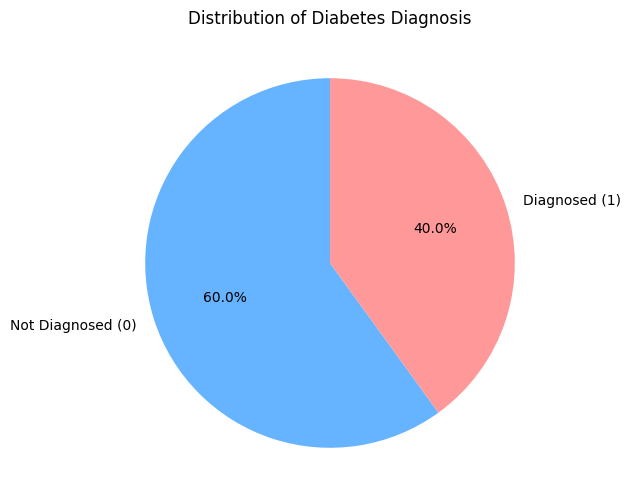

In [21]:
import matplotlib.pyplot as plt

# Count the number of diagnosed vs. not diagnosed
diagnosis_counts = whole_data['Diagnosis'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(diagnosis_counts, labels=['Not Diagnosed (0)', 'Diagnosed (1)'], autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Distribution of Diabetes Diagnosis')
plt.show()

It does seem like we have more people who are not diagnosed to have diabetes, however the percentages seem a bit fishy

We will pay closer attention to the causes/things which are related to the diagnosis of diabetes, which we know of from our ***DU*** and the categorical values which we have

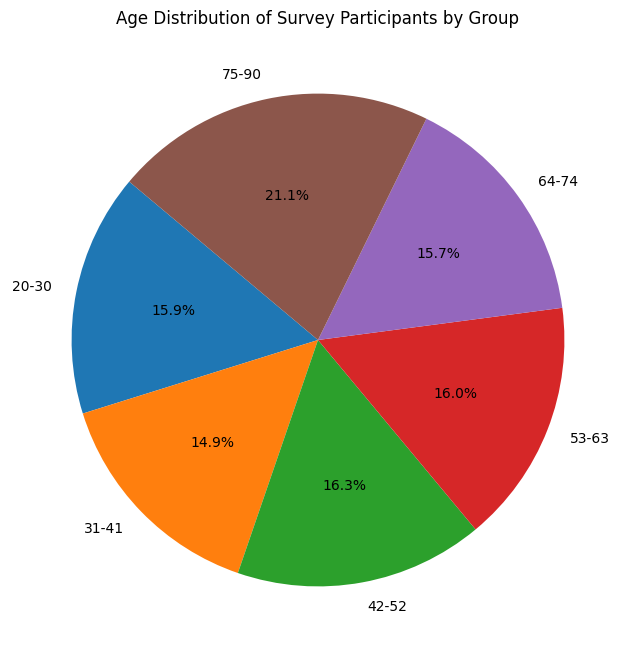

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Define age bins within the range of 20 to 90
bins = [20, 31, 42, 53, 64, 75, 90]  # Adjusted to create 6 bins within the 20-90 range
labels = ['20-30', '31-41', '42-52', '53-63', '64-74', '75-90']

# Categorize ages into bins
whole_data['AgeGroup'] = pd.cut(whole_data['Age'], bins=bins, labels=labels, right=False)

# Count occurrences in each bin
age_group_counts = whole_data['AgeGroup'].value_counts(sort=False)  # sort=False to maintain the order of bins

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Age Distribution of Survey Participants by Group')
plt.show()

In [23]:
whole_data.isna().sum()

PatientID                         0
Age                               0
Gender                            0
Ethnicity                         0
SocioeconomicStatus               0
EducationLevel                    0
BMI                               0
Smoking                           0
AlcoholConsumption                0
PhysicalActivity                  0
DietQuality                       0
SleepQuality                      0
FamilyHistoryDiabetes             0
GestationalDiabetes               0
PolycysticOvarySyndrome           0
PreviousPreDiabetes               0
Hypertension                      0
SystolicBP                        0
DiastolicBP                       0
FastingBloodSugar                 0
HbA1c                             0
SerumCreatinine                   0
BUNLevels                         0
CholesterolTotal                  0
CholesterolLDL                    0
CholesterolHDL                    0
CholesterolTriglycerides          0
AntihypertensiveMedications 

In [24]:
# Assuming 'whole_data' is your DataFrame
nan_agegroup_rows = whole_data[whole_data['AgeGroup'].isna()]

# Print the rows where AgeGroup is NaN
nan_agegroup_rows

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,AgeGroup
19,6019,90,0,0,0,2,35.853330,0,4.422626,7.429686,...,1,11.734922,0,0,0,2.416942,2.356242,5.738591,1,NaN
76,6076,90,1,0,2,1,19.788610,0,13.284814,7.063108,...,0,66.055832,0,0,0,3.704644,1.095211,5.524610,1,NaN
100,6100,90,0,2,1,0,36.788627,1,1.799198,2.564727,...,0,78.818839,1,0,0,0.202265,7.754410,9.167593,1,NaN
176,6176,90,1,0,1,2,39.429551,0,10.286820,0.332014,...,0,28.093566,0,0,0,3.485196,7.475298,5.227730,0,NaN
208,6208,90,0,0,0,1,27.289398,0,9.351907,6.969101,...,0,65.315463,0,0,0,2.762174,7.422491,5.672697,1,NaN
231,6231,90,1,0,2,3,22.986589,1,2.424119,2.847354,...,0,58.264281,0,0,1,3.337115,1.024909,2.080876,1,NaN
423,6423,90,1,2,1,0,35.504741,0,14.548585,2.224244,...,0,10.903574,0,0,0,0.506138,6.440951,5.303896,1,NaN
625,6625,90,1,0,2,1,38.667766,1,5.248007,1.415017,...,0,90.136049,0,0,0,0.624746,5.799004,8.562323,0,NaN
739,6739,90,1,0,0,3,34.632281,0,19.891408,1.523061,...,0,62.855774,0,0,0,2.949448,9.555752,3.768971,1,NaN
757,6757,90,0,2,2,1,28.789565,0,6.322282,1.093298,...,0,30.923075,0,0,0,1.335322,8.433395,6.669160,0,NaN


Let's see what does it look like with the people who are diagnosed and the ones who are not diagnosed

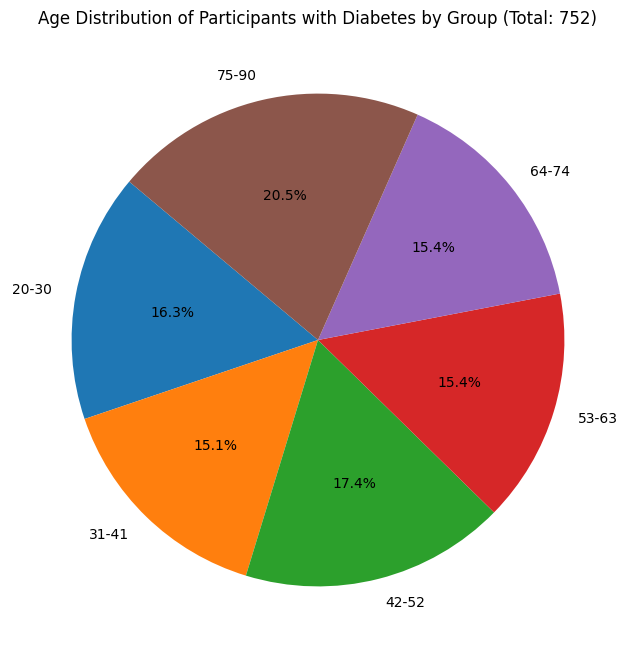

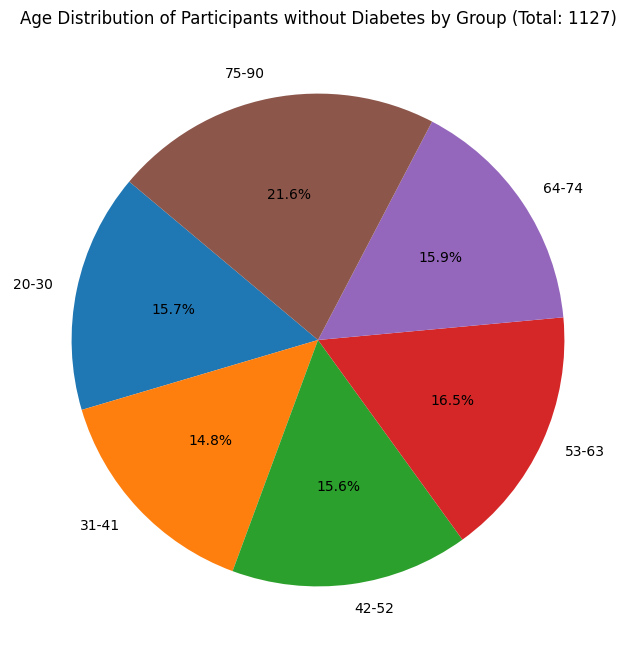

In [25]:
# Filter the dataset into two groups
diabetes_data = whole_data[whole_data['Diagnosis'] == 1]
no_diabetes_data = whole_data[whole_data['Diagnosis'] == 0]

# Count occurrences in each bin for people with diabetes
age_group_counts_diabetes = diabetes_data['AgeGroup'].value_counts(sort=False)

# Count occurrences in each bin for people without diabetes
age_group_counts_no_diabetes = no_diabetes_data['AgeGroup'].value_counts(sort=False)

# Calculate total number of people with and without diabetes
total_with_diabetes = diabetes_data.shape[0]
total_without_diabetes = no_diabetes_data.shape[0]

# Plotting the pie chart for people with diabetes
plt.figure(figsize=(10, 8))
plt.pie(age_group_counts_diabetes, labels=age_group_counts_diabetes.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Age Distribution of Participants with Diabetes by Group (Total: {total_with_diabetes})')
plt.show()

# Plotting the pie chart for people without diabetes
plt.figure(figsize=(10, 8))
plt.pie(age_group_counts_no_diabetes, labels=age_group_counts_no_diabetes.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Age Distribution of Participants without Diabetes by Group (Total: {total_without_diabetes})')
plt.show()

Once again, quite even, despite the fact that there is a difference in the amount of data which we are working with 

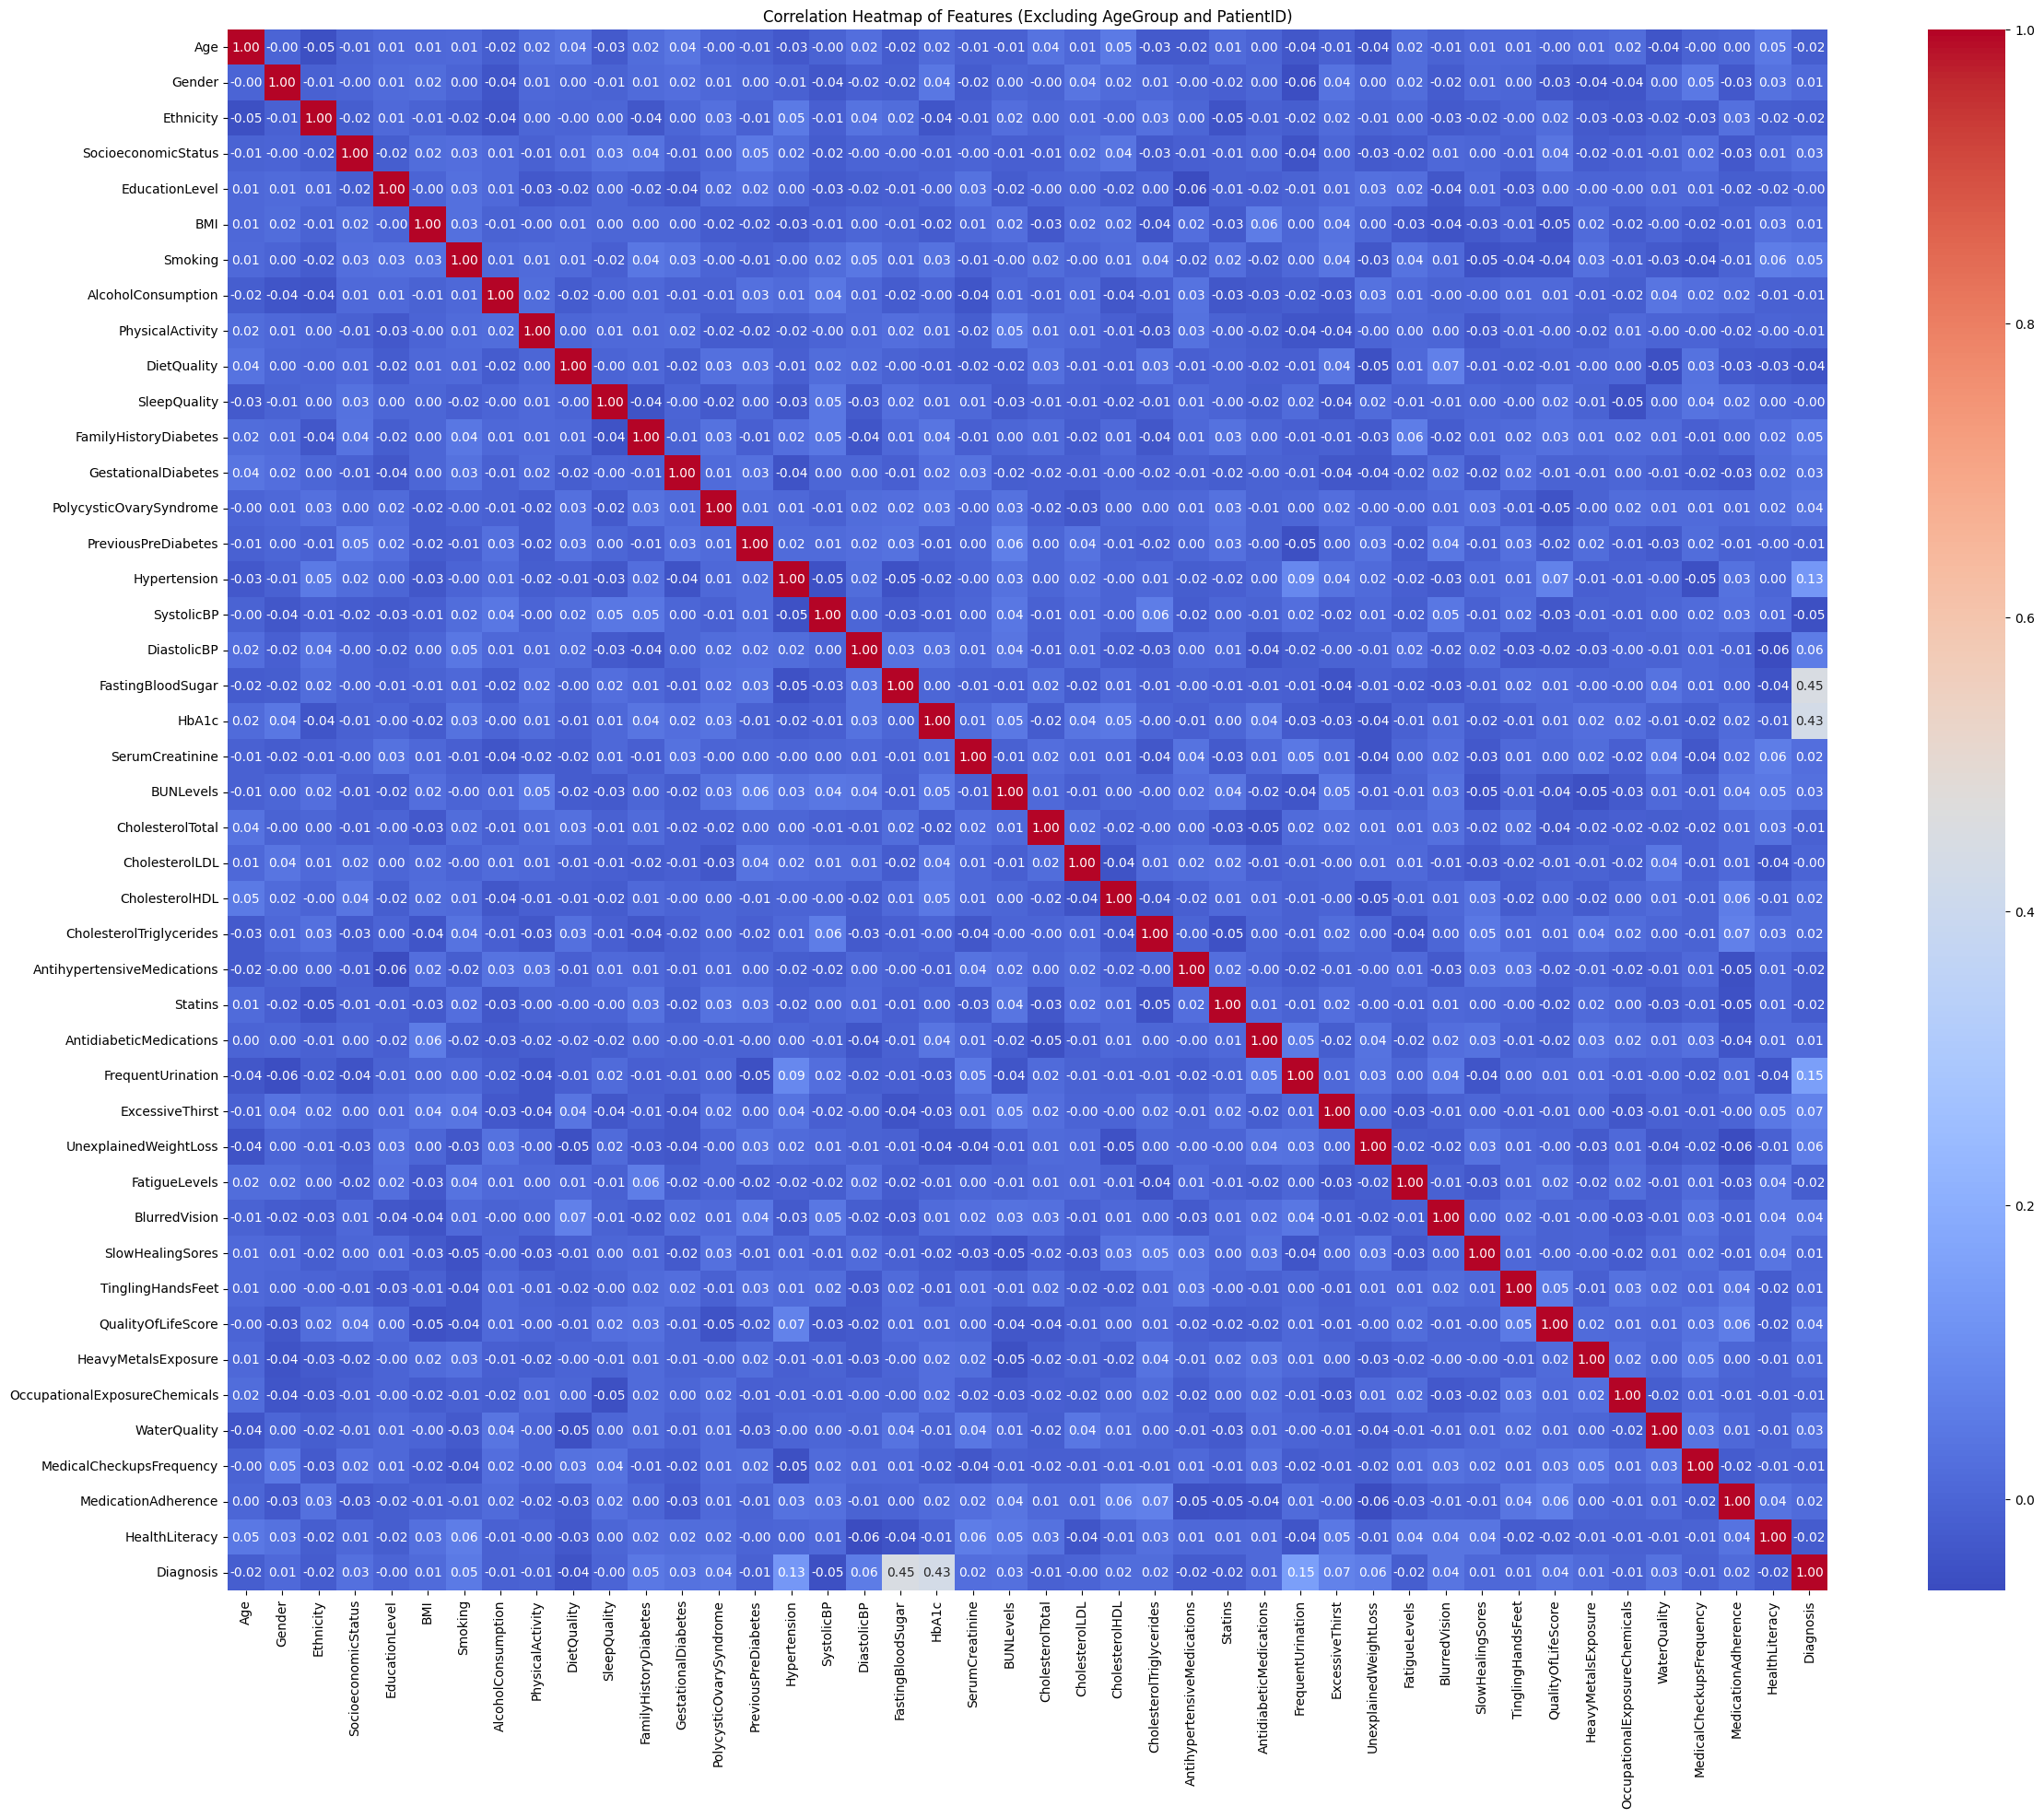

In [26]:
# Drop 'AgeGroup' and 'PatientID' columns from the DataFrame
whole_data_modified = whole_data.drop(['AgeGroup', 'PatientID'], axis=1)

# Calculate the correlation matrix for the modified DataFrame
corr_matrix = whole_data_modified.corr()

# Plotting the heatmap
plt.figure(figsize=(28, 22))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Features (Excluding AgeGroup and PatientID)')
plt.show()

It would be a good idea to focus our attention to the Diagnosis row. Let us focus our attention and the possible, higher factor linear correlation features such as `Smoking`,`FamilyHistoryDiabetes`,`DiastolicBP`,`Hypertension`,`FastingBloodSugar`,`HbA1c`,`FrequentUrination`,`ExcessiveThirst`,`UnexplainedWeightLoss`. It is good to keep them in mind since they do overlap with our domain understanding. 

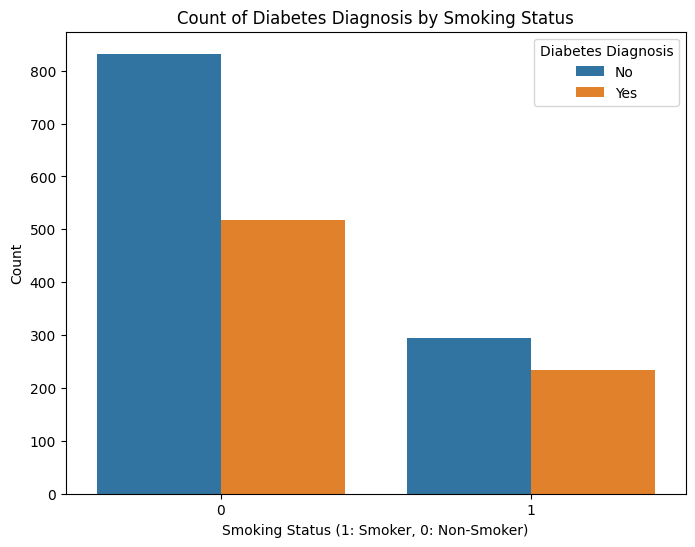

In [27]:
# Create a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Smoking', hue='Diagnosis', data=whole_data)

plt.title('Count of Diabetes Diagnosis by Smoking Status')
plt.xlabel('Smoking Status (1: Smoker, 0: Non-Smoker)')
plt.ylabel('Count')
plt.legend(title='Diabetes Diagnosis', labels=['No', 'Yes'])

plt.show()

We do have more cases of people who were not smokers, however, the patients who were diagnosed with the illness do seem to be more even, which is something to take into consideration. That does give us the impression that the smokers somehow are more succeptable to developing diabetes. Let us get a better visualization of that

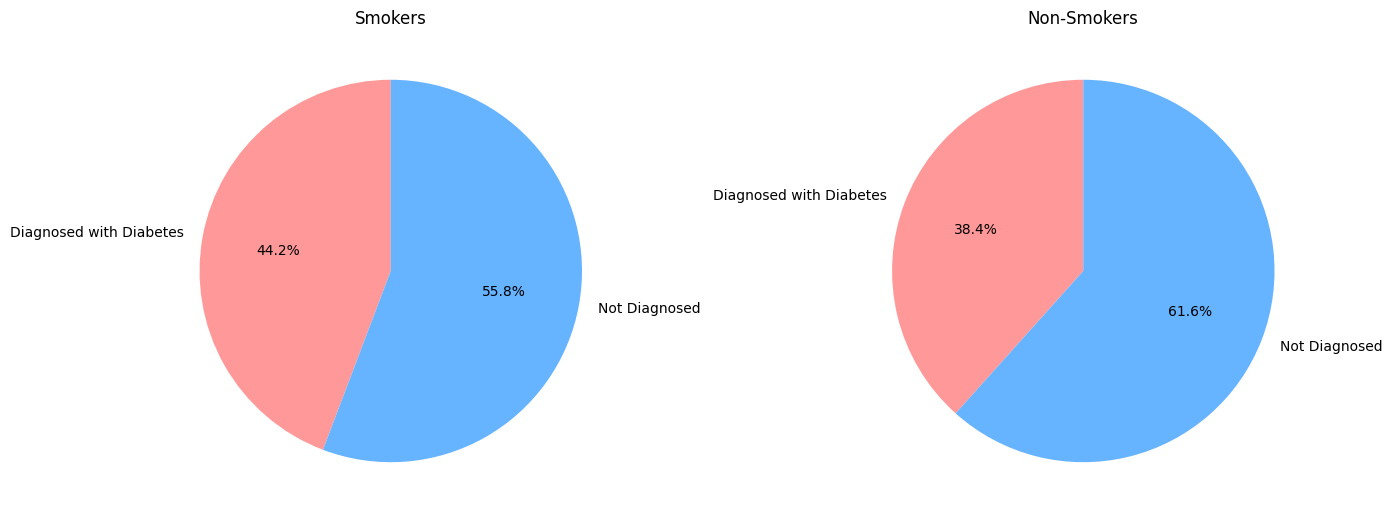

In [28]:
# Calculate percentages
smokers_diagnosed_percentage = whole_data[whole_data['Smoking'] == 1]['Diagnosis'].mean() * 100
non_smokers_diagnosed_percentage = whole_data[whole_data['Smoking'] == 0]['Diagnosis'].mean() * 100

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Pie chart for smokers
axs[0].pie([smokers_diagnosed_percentage, 100 - smokers_diagnosed_percentage], labels=['Diagnosed with Diabetes', 'Not Diagnosed'], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
axs[0].set_title('Smokers')

# Pie chart for non-smokers
axs[1].pie([non_smokers_diagnosed_percentage, 100 - non_smokers_diagnosed_percentage], labels=['Diagnosed with Diabetes', 'Not Diagnosed'], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
axs[1].set_title('Non-Smokers')

plt.tight_layout()
plt.show()

As suspected, smokers do seem to have a higher correlation with the possible diagnosis and development of diabetes

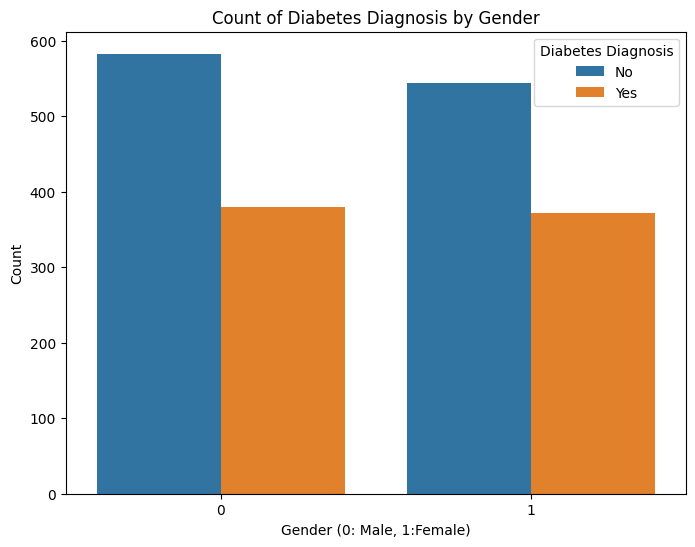

In [29]:
# Create a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Diagnosis', data=whole_data)

plt.title('Count of Diabetes Diagnosis by Gender')
plt.xlabel('Gender (0: Male, 1:Female)')
plt.ylabel('Count')
plt.legend(title='Diabetes Diagnosis', labels=['No', 'Yes'])

plt.show()

It is equivelent among the genders as well

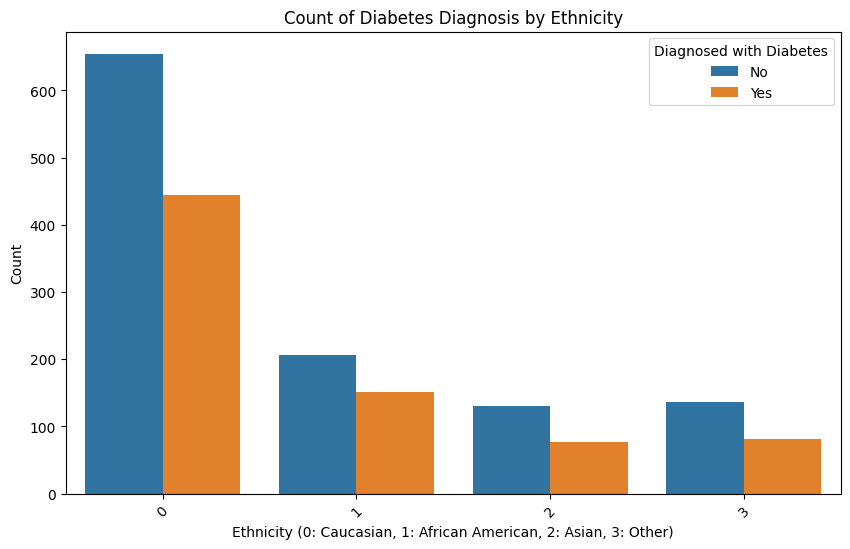

In [30]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Ethnicity', hue='Diagnosis', data=whole_data)

plt.title('Count of Diabetes Diagnosis by Ethnicity')
plt.xlabel('Ethnicity (0: Caucasian, 1: African American, 2: Asian, 3: Other)')
plt.ylabel('Count')
plt.legend(title='Diagnosed with Diabetes', labels=['No', 'Yes'])

plt.xticks(rotation=45)  # Rotate labels to avoid overlap if necessary

plt.show()

It does seem to consider quite a lot of the people who are caucasian, which has been documented. There were docummented cases:

https://www.mayoclinic.org/diseases-conditions/diabetes/symptoms-causes/syc-20371444

    " ...Race or ethnicity also may raise your risk 
    of developing type 2 diabetes. Although it's unclear why,
    certain people — including Black, Hispanic, American Indian
    and Asian American people — are at higher risk..."

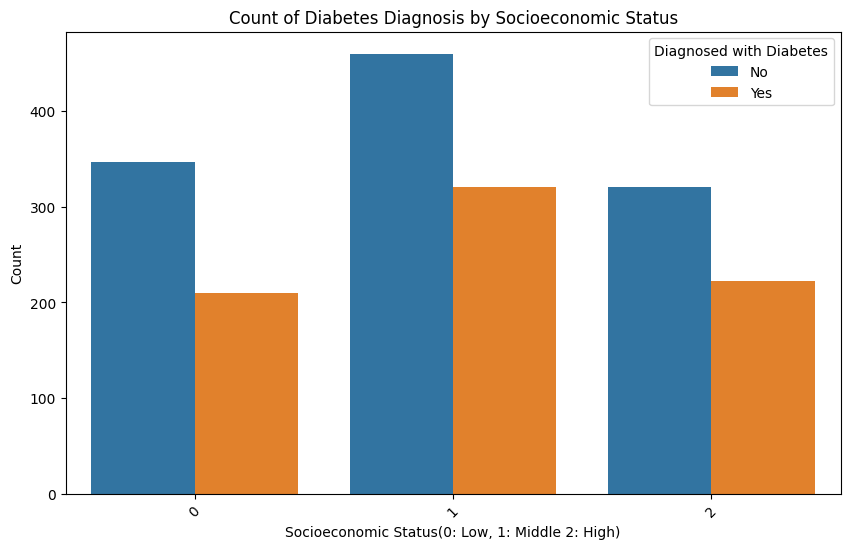

In [31]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='SocioeconomicStatus', hue='Diagnosis', data=whole_data)

plt.title('Count of Diabetes Diagnosis by Socioeconomic Status')
plt.xlabel('Socioeconomic Status(0: Low, 1: Middle 2: High)')
plt.ylabel('Count')
plt.legend(title='Diagnosed with Diabetes', labels=['No', 'Yes'])

plt.xticks(rotation=45)  # Rotate labels to avoid overlap if necessary

plt.show()

Let us see more about the distribution, becuase I am curios. It was documented that people of low and middle socioeconomic status are likely to develop diabetes, but it seems a little bit even here

Text(0, 0.5, 'Socioeconomic Status (0: Low, 1: Middle, 2: High)')

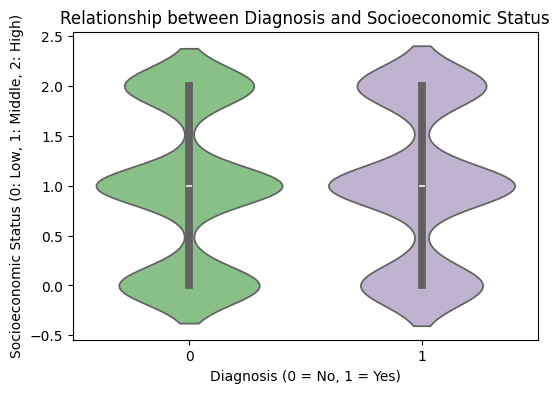

In [32]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)  # Suppress specific FutureWarning

plt.figure(figsize=(6, 4))

# Violin Plot Between Diagnosis and Socioeconomic Status
sns.violinplot(data=whole_data, x='Diagnosis', y='SocioeconomicStatus', palette='Accent')
plt.title('Relationship between Diagnosis and Socioeconomic Status')
plt.xlabel('Diagnosis (0 = No, 1 = Yes)')
plt.ylabel('Socioeconomic Status (0: Low, 1: Middle, 2: High)')

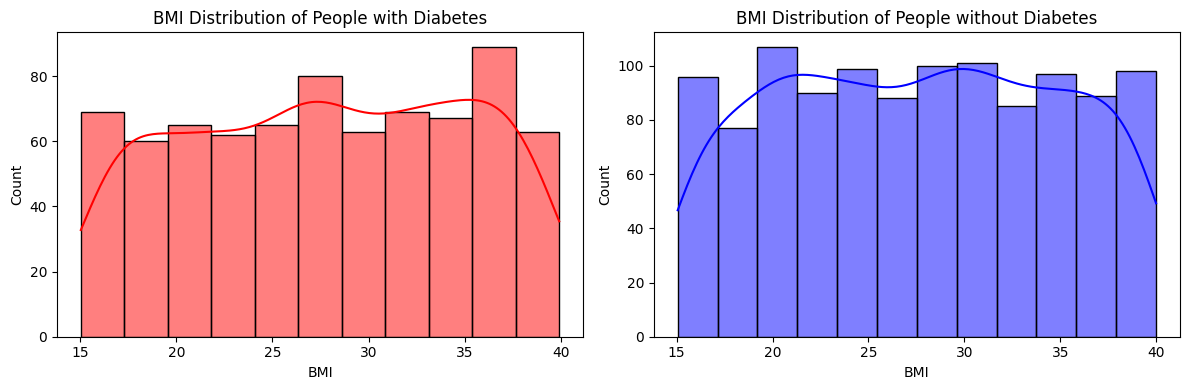

In [33]:
plt.figure(figsize=(12, 4))

# Histogram Plot for BMI of People Diagnosed with Diabetes
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.histplot(data=whole_data[whole_data['Diagnosis'] == 1], x='BMI', color='red', kde=True)
plt.title('BMI Distribution of People with Diabetes')
plt.xlabel('BMI')
plt.ylabel('Count')

# Histogram Plot for BMI of People Not Diagnosed with Diabetes
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.histplot(data=whole_data[whole_data['Diagnosis'] == 0], x='BMI', color='blue', kde=True)
plt.title('BMI Distribution of People without Diabetes')
plt.xlabel('BMI')
plt.ylabel('Count')

plt.tight_layout()

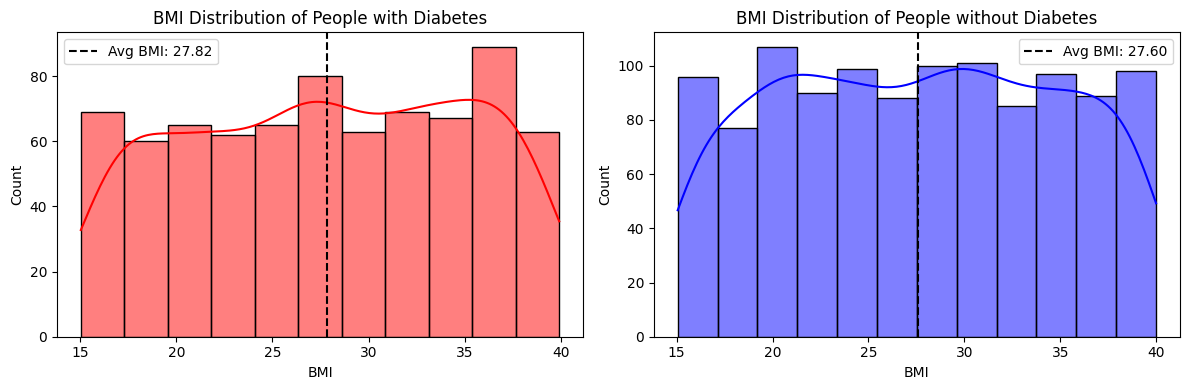

In [34]:
plt.figure(figsize=(12, 4))

# Calculate average BMI for people with and without diabetes
avg_bmi_diabetes = whole_data[whole_data['Diagnosis'] == 1]['BMI'].mean()
avg_bmi_no_diabetes = whole_data[whole_data['Diagnosis'] == 0]['BMI'].mean()

# Histogram Plot for BMI of People Diagnosed with Diabetes
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.histplot(data=whole_data[whole_data['Diagnosis'] == 1], x='BMI', color='red', kde=True)
plt.axvline(avg_bmi_diabetes, color='k', linestyle='--', label=f'Avg BMI: {avg_bmi_diabetes:.2f}')
plt.title('BMI Distribution of People with Diabetes')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.legend()

# Histogram Plot for BMI of People Not Diagnosed with Diabetes
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.histplot(data=whole_data[whole_data['Diagnosis'] == 0], x='BMI', color='blue', kde=True)
plt.axvline(avg_bmi_no_diabetes, color='k', linestyle='--', label=f'Avg BMI: {avg_bmi_no_diabetes:.2f}')
plt.title('BMI Distribution of People without Diabetes')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()

It is a little bit interesting to see that all of the people have similiar BMI, however, it should be noted that poeple with a higher body mass index, are more prone to developing diabetes. The results that we are shown here do raise a concern on the legitimecy of the dataset. 

-https://www.honorhealth.com/medical-services/bariatric-weight-loss-surgery/patient-education-and-support/comorbidities-type-2-diabetes


    "What you consume throughout your day and how active you are affects your risk of developing type 2 diabetes. Being overweight (BMI of 25-29.9), or affected by obesity (BMI of 30-39.9) or morbid obesity (BMI of 40 or greater), greatly increases your risk of developing type 2 diabetes. The more excess weight you have, the more resistant your muscle and tissue cells become to your own insulin hormone. More than 90% of people with type 2 diabetes are overweight or affected by a degree of obesity."

Let us continue with another one of the considered major factors:

If somebody in the family previously had it

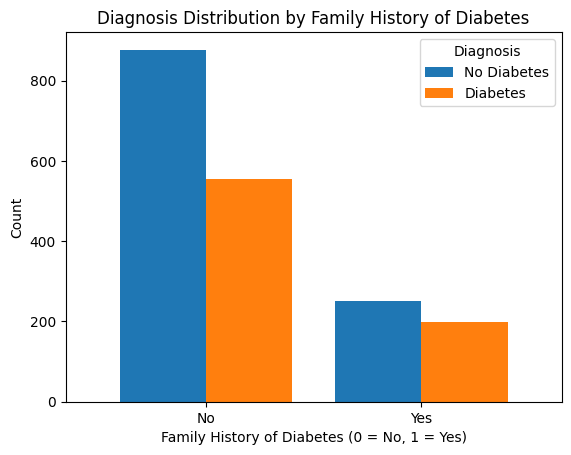

In [35]:
grouped_data = whole_data.groupby(['FamilyHistoryDiabetes', 'Diagnosis']).size().unstack()

# Plotting the bar charts side by side
ax = grouped_data.plot(kind='bar', width=0.8)
plt.title('Diagnosis Distribution by Family History of Diabetes')
plt.xlabel('Family History of Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)  # Adjusting x-axis labels for clarity
plt.legend(title='Diagnosis', labels=['No Diabetes', 'Diabetes'])
plt.show()

I am not happy with this current way of visualising the data

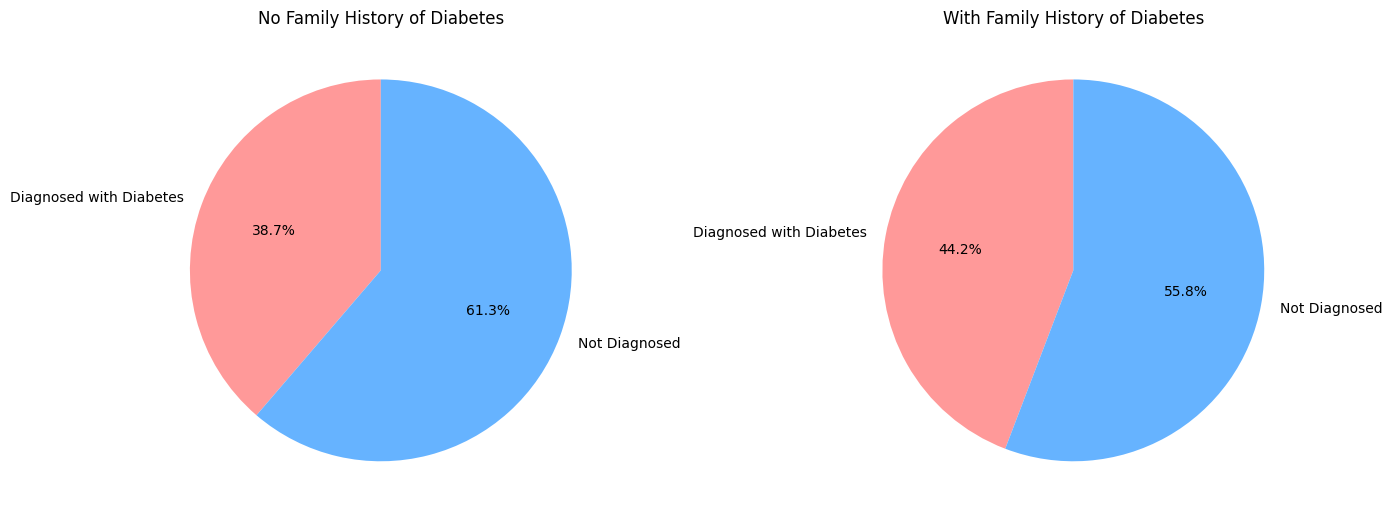

In [36]:
import matplotlib.pyplot as plt

# Calculate the total counts for each group
total_counts = grouped_data.sum(axis=1)

# Calculate the percentage of people diagnosed with diabetes in each group
percentage_diabetes = (grouped_data[1] / total_counts) * 100  # Assuming '1' represents 'Diagnosed with Diabetes'

# Create a DataFrame with these percentages
percentage_df = percentage_diabetes.reset_index().rename(columns={1: 'Percentage with Diabetes'})


# Rename the column '0' to 'Percentage with Diabetes'
percentage_df = percentage_df.rename(columns={0: 'Percentage with Diabetes'})


# Data preparation
no_family_history_percentage = percentage_df.loc[percentage_df['FamilyHistoryDiabetes'] == 0, 'Percentage with Diabetes'].values[0]
with_family_history_percentage = percentage_df.loc[percentage_df['FamilyHistoryDiabetes'] == 1, 'Percentage with Diabetes'].values[0]

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Pie chart for people without a family history of diabetes
axs[0].pie([no_family_history_percentage, 100 - no_family_history_percentage], labels=['Diagnosed with Diabetes', 'Not Diagnosed'], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
axs[0].set_title('No Family History of Diabetes')

# Pie chart for people with a family history of diabetes
axs[1].pie([with_family_history_percentage, 100 - with_family_history_percentage], labels=['Diagnosed with Diabetes', 'Not Diagnosed'], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
axs[1].set_title('With Family History of Diabetes')

plt.tight_layout()
plt.show()

It does seem to also give us quite a bump in the percentages so I would keep it in mind when creating the model. It does show in my opinion a that the fact is, the heredetery disposition plays quite a vital role

### Current Conclusion:
We will first work on a model which has the factors that were considered important in the domain understadning as well as some of the symptoms. Not only that but some of the things which our correlation matrix does seem to show, which are the the factors used for a diagnosis as well, when it comes to the selection of the features. This will include:

- BMI
- Age
- FamilyHistoryDiabetes
- Smoking

as well as (used in the medical field to diagnose diabetes): 

- FastingBloodSugar
- HbA1c


# **Phase 3**

### Preprocessing and modeling

### Downsampling

The initial plan is to probably downsample the data since there are who were not diagnosed to have diabetes

In [37]:
diabetes = whole_data[whole_data['Diagnosis'] == 1]
no_diabetes_data = whole_data[whole_data['Diagnosis'] == 0]

# Since diagnosed cases are fewer, downsample the not_diagnosed group to match the diagnosed group's size
not_diagnosed_downsampled = no_diabetes_data.sample(n=len(diabetes), random_state=42)

# Concatenate the downsampled not_diagnosed group with the diagnosed group
balanced_data_downsampled = pd.concat([diabetes, not_diagnosed_downsampled])

balanced_data_downsampled['Diagnosis'].value_counts()


Diagnosis
1    752
0    752
Name: count, dtype: int64

### Upsampling 

In [38]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd


# Separate features and target variable
# target = 'Diagnosis'
X = whole_data.drop(['Diagnosis','AgeGroup'], axis=1)
y = whole_data['Diagnosis']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine the resampled features and target into a single DataFrame
balanced_data_smote = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['Diagnosis'])], axis=1)

# Display the new value counts
print(balanced_data_smote['Diagnosis'].value_counts())

Diagnosis
1    1127
0    1127
Name: count, dtype: int64


Now that the data is of equal size, it will be better for training and testing the model, giving it an easier way to distinguish the the wanted results with the features that we want

## Gradient Boosting Classifier


The reason for using GBC is because it is a powerfull model, which is good for classification.
We will try the differenct training and testing spilts as well with the 2 training sets we just created.


### This is the 80/20 - train/test split with the downsampled dataset

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Prepare the data from 'balanced_data'
features = ['BMI', 'Age', 'FamilyHistoryDiabetes', 'Smoking', 'FastingBloodSugar', 'HbA1c']
X = balanced_data_downsampled[features]
y = balanced_data_downsampled['Diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = gb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.8637873754152824


##### Evaluation - Confusion Matrix, Feature imporance and classification report

#### ***Confusion matrix***

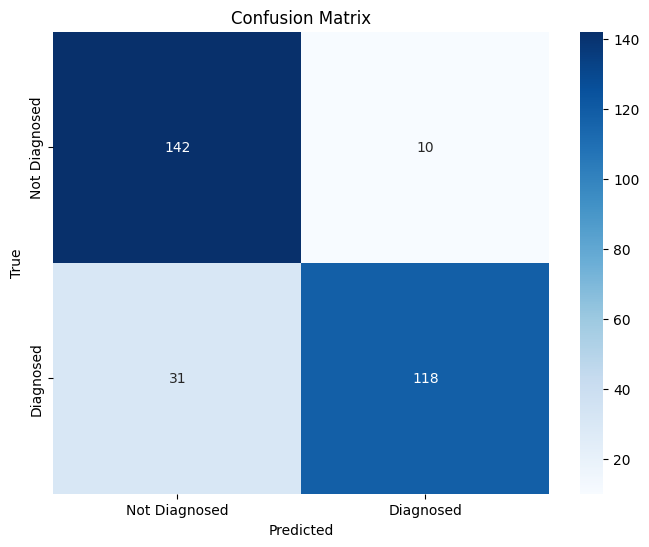

The amount of correctly predicted individuals, who did not have the condition (True negative): 142
The amount of correctly predicted individuals, who did have the condition (True positive): 118
The amount of incorrectly predicted individuals, predicted to have the condition, but actually did not (False positive): 10
The amount of incorrectly predicted individuals, predicted to  not have the condition, but actually did (False negative): 31


In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Diagnosed', 'Diagnosed'], yticklabels=['Not Diagnosed', 'Diagnosed'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

tn, fp, fn, tp = cm.ravel()
print(f"The amount of correctly predicted individuals, who did not have the condition (True negative): {tn}")
print(f"The amount of correctly predicted individuals, who did have the condition (True positive): {tp}")
print(f"The amount of incorrectly predicted individuals, predicted to have the condition, but actually did not (False positive): {fp}")
print(f"The amount of incorrectly predicted individuals, predicted to  not have the condition, but actually did (False negative): {fn}")

#### ***Feature importance***

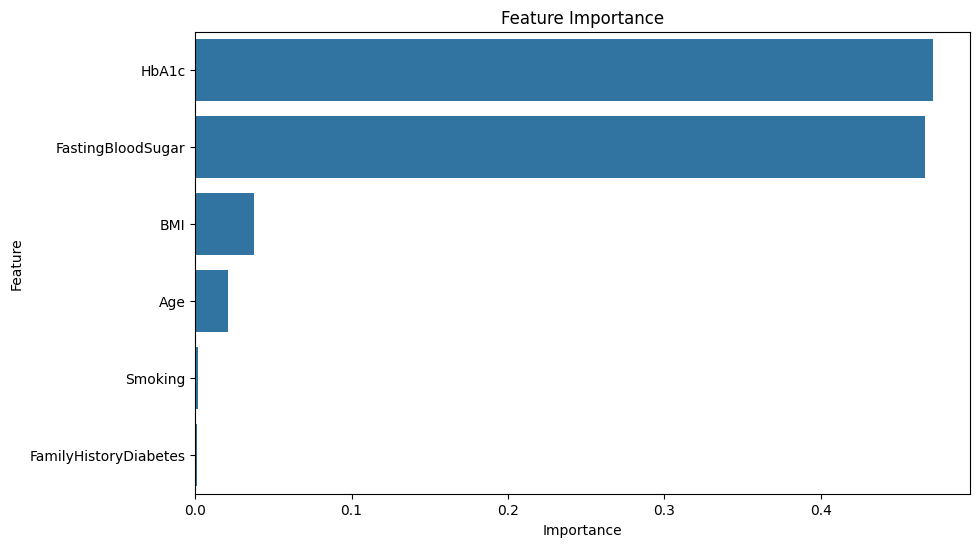

In [41]:
import pandas as pd

# Extract feature importance
feature_importance = gb_model.feature_importances_

# Create a DataFrame for visualization
features_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})

# Sort the DataFrame based on importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#### ***Classification report***

In [42]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=['Not Diagnosed', 'Diagnosed'])

print(report)

               precision    recall  f1-score   support

Not Diagnosed       0.82      0.93      0.87       152
    Diagnosed       0.92      0.79      0.85       149

     accuracy                           0.86       301
    macro avg       0.87      0.86      0.86       301
 weighted avg       0.87      0.86      0.86       301



### This is the 70/30 - train/test split with the downsampled dataset

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Prepare the data from 'balanced_data'
features = ['BMI', 'Age', 'FamilyHistoryDiabetes', 'Smoking', 'FastingBloodSugar', 'HbA1c']
X = balanced_data_downsampled[features]
y = balanced_data_downsampled['Diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = gb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.8716814159292036


#### ***Confusion matrix***

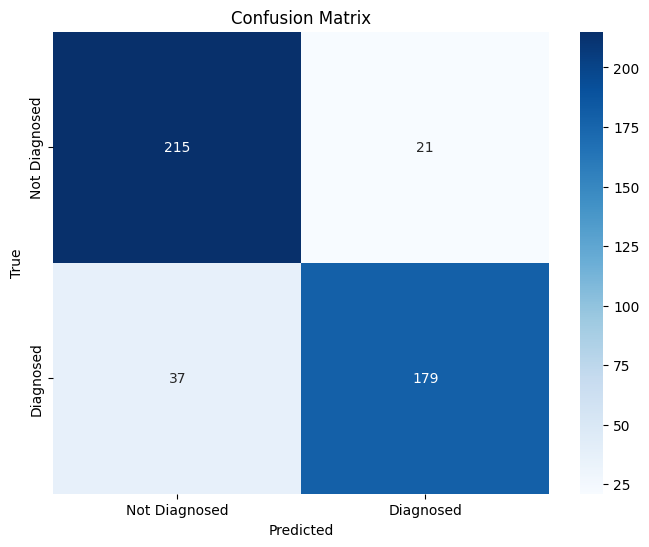

The amount of correctly predicted individuals, who did not have the condition (True negative): 215
The amount of correctly predicted individuals, who did have the condition (True positive): 179
The amount of incorrectly predicted individuals, predicted to have the condition, but actually did not (False positive): 21
The amount of incorrectly predicted individuals, predicted to  not have the condition, but actually did (False negative): 37


In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Diagnosed', 'Diagnosed'], yticklabels=['Not Diagnosed', 'Diagnosed'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

tn, fp, fn, tp = cm.ravel()
print(f"The amount of correctly predicted individuals, who did not have the condition (True negative): {tn}")
print(f"The amount of correctly predicted individuals, who did have the condition (True positive): {tp}")
print(f"The amount of incorrectly predicted individuals, predicted to have the condition, but actually did not (False positive): {fp}")
print(f"The amount of incorrectly predicted individuals, predicted to  not have the condition, but actually did (False negative): {fn}")

#### ***Feature importance***

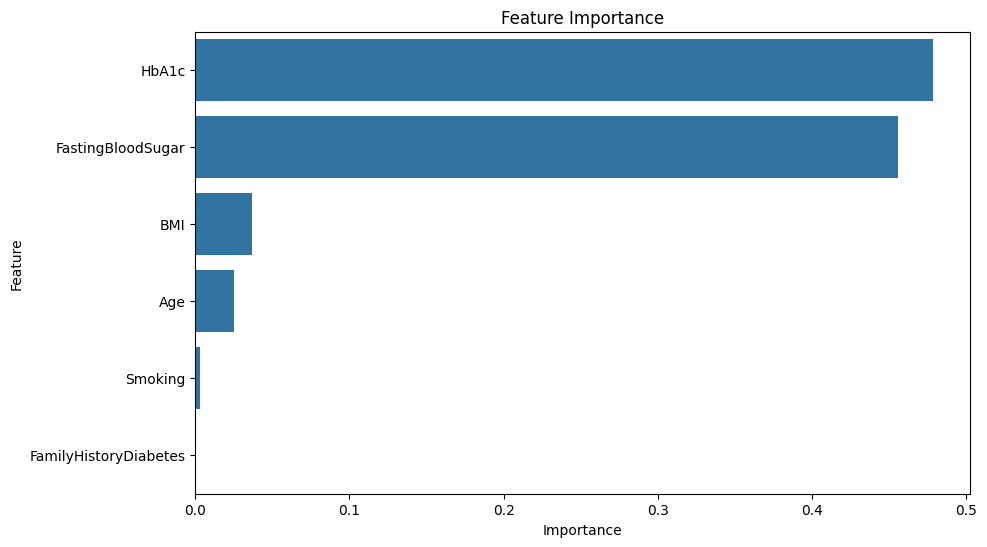

In [45]:
import pandas as pd

# Extract feature importance
feature_importance = gb_model.feature_importances_

# Create a DataFrame for visualization
features_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})

# Sort the DataFrame based on importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#### ***Classification report***

In [46]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=['Not Diagnosed', 'Diagnosed'])

print(report)

               precision    recall  f1-score   support

Not Diagnosed       0.85      0.91      0.88       236
    Diagnosed       0.90      0.83      0.86       216

     accuracy                           0.87       452
    macro avg       0.87      0.87      0.87       452
 weighted avg       0.87      0.87      0.87       452



### Training and Testing - Gradient Boosting Classifier - 2


### This is the 80/20 - train/test split with the upsampled dataset

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Prepare the data from 'balanced_data'
features = ['BMI', 'Age', 'FamilyHistoryDiabetes', 'Smoking', 'FastingBloodSugar', 'HbA1c']
X = balanced_data_smote[features]
y = balanced_data_smote['Diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = gb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.8913525498891353


#### ***Confusion matrix***

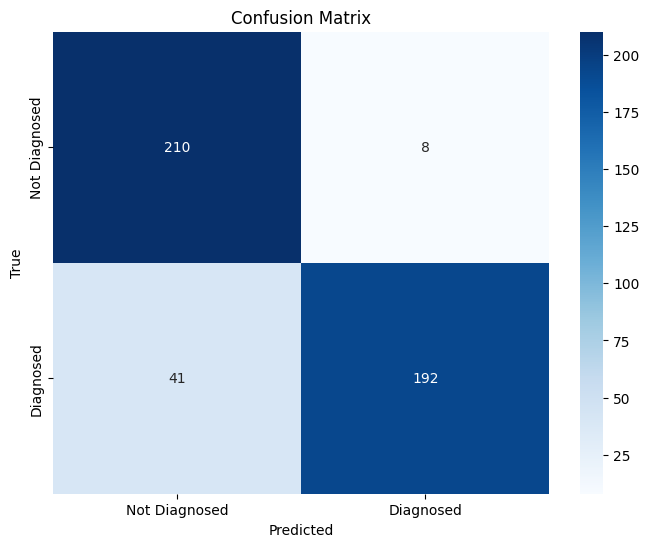

The amount of correctly predicted individuals, who did not have the condition (True negative): 210
The amount of correctly predicted individuals, who did have the condition (True positive): 192
The amount of incorrectly predicted individuals, predicted to have the condition, but actually did not (False positive): 8
The amount of incorrectly predicted individuals, predicted to  not have the condition, but actually did (False negative): 41


In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Diagnosed', 'Diagnosed'], yticklabels=['Not Diagnosed', 'Diagnosed'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

tn, fp, fn, tp = cm.ravel()
print(f"The amount of correctly predicted individuals, who did not have the condition (True negative): {tn}")
print(f"The amount of correctly predicted individuals, who did have the condition (True positive): {tp}")
print(f"The amount of incorrectly predicted individuals, predicted to have the condition, but actually did not (False positive): {fp}")
print(f"The amount of incorrectly predicted individuals, predicted to  not have the condition, but actually did (False negative): {fn}")

#### ***Feature importance***

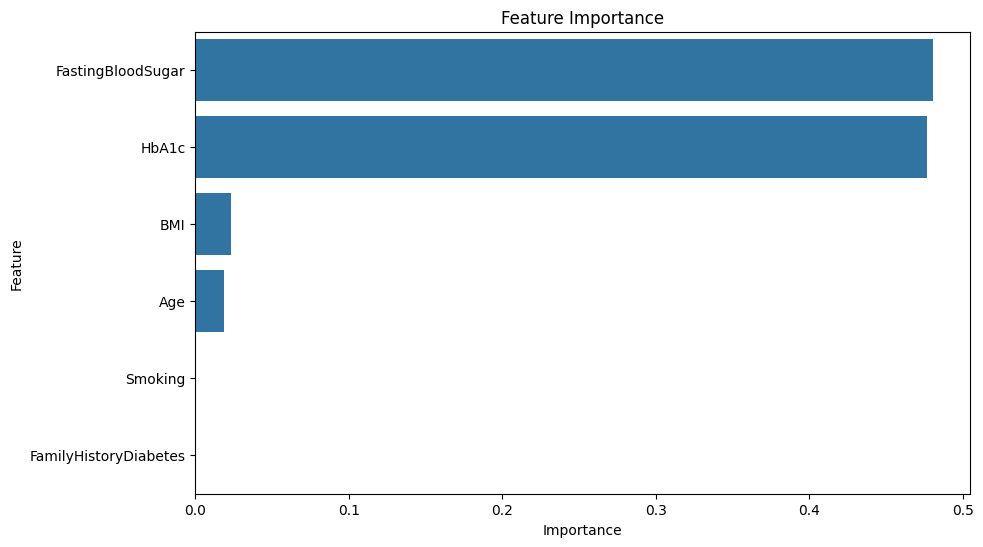

In [49]:
import pandas as pd

# Extract feature importance
feature_importance = gb_model.feature_importances_

# Create a DataFrame for visualization
features_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})

# Sort the DataFrame based on importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#### ***Classification report***

In [50]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=['Not Diagnosed', 'Diagnosed'])

print(report)

               precision    recall  f1-score   support

Not Diagnosed       0.84      0.96      0.90       218
    Diagnosed       0.96      0.82      0.89       233

     accuracy                           0.89       451
    macro avg       0.90      0.89      0.89       451
 weighted avg       0.90      0.89      0.89       451



In [69]:
import numpy as np
import pandas as pd

# Assuming these are the feature names used during model training
feature_names = ['BMI', 'Age', 'FamilyHistoryDiabetes', 'Smoking', 'FastingBloodSugar', 'HbA1c']

# Define the feature values for each case using a DataFrame to include feature names
case_1_features = pd.DataFrame([[32.0, 45, 1, 0, 150, 6.5]], columns=feature_names)  # High risk of diabetes
case_2_features = pd.DataFrame([[22.0, 30, 0, 0, 90, 5.2]], columns=feature_names)  # Low risk of diabetes

# Predict the outcome for each case using the trained model
case_1_prediction = gb_model.predict(case_1_features)
case_2_prediction = gb_model.predict(case_2_features)

# Print customized messages based on the predictions
case_1_message = "Your results seem to indicate that there might be a problem, it would be a good idea to see a doctor!" if case_1_prediction[0] == 1 else "Everything seems all right!"
case_2_message = "Your results seem to indicate that there might be a problem,, it would be a good idea to see a doctor!" if case_2_prediction[0] == 1 else "Everything seems all right!"

print(f"Case 1 Prediction: {case_1_message}")
print(f"Case 2 Prediction: {case_2_message}")

Case 1 Prediction: Your results seem to indicate that you have diabetes, it would be a good idea to see a doctor!
Case 2 Prediction: Everything seems all right!


### This is the 70/30 - train/test split with the upsampled dataset

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Prepare the data from 'balanced_data'
features = ['BMI', 'Age', 'FamilyHistoryDiabetes', 'Smoking', 'FastingBloodSugar', 'HbA1c']
X = balanced_data_smote[features]
y = balanced_data_smote['Diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = gb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.8759231905465288


#### ***Confusion matrix***

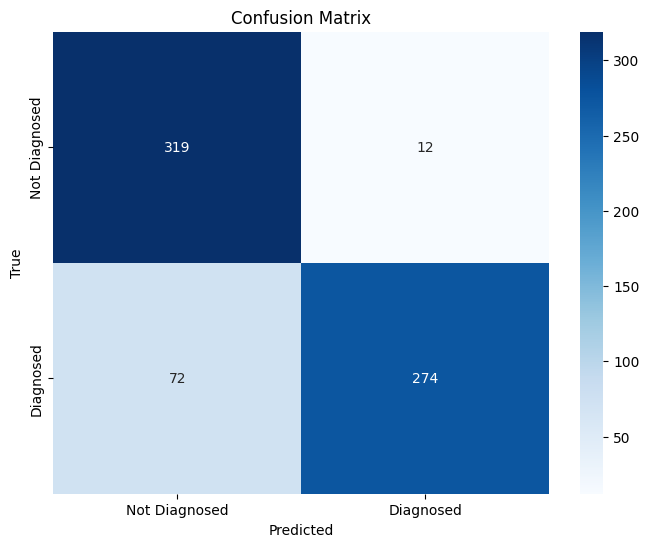

The amount of correctly predicted individuals, who did not have the condition (True negative): 319
The amount of correctly predicted individuals, who did have the condition (True positive): 274
The amount of incorrectly predicted individuals, predicted to have the condition, but actually did not (False positive): 12
The amount of incorrectly predicted individuals, predicted to  not have the condition, but actually did (False negative): 72


In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Diagnosed', 'Diagnosed'], yticklabels=['Not Diagnosed', 'Diagnosed'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

tn, fp, fn, tp = cm.ravel()
print(f"The amount of correctly predicted individuals, who did not have the condition (True negative): {tn}")
print(f"The amount of correctly predicted individuals, who did have the condition (True positive): {tp}")
print(f"The amount of incorrectly predicted individuals, predicted to have the condition, but actually did not (False positive): {fp}")
print(f"The amount of incorrectly predicted individuals, predicted to  not have the condition, but actually did (False negative): {fn}")

#### ***Feature importance***

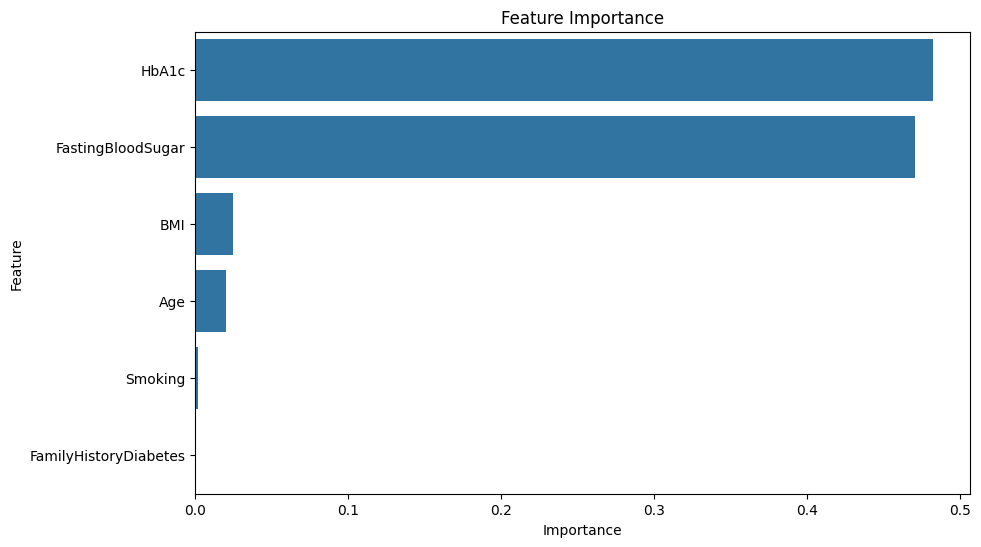

In [54]:
import pandas as pd

# Extract feature importance
feature_importance = gb_model.feature_importances_

# Create a DataFrame for visualization
features_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})

# Sort the DataFrame based on importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#### ***Classification report***

In [55]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=['Not Diagnosed', 'Diagnosed'])

print(report)

               precision    recall  f1-score   support

Not Diagnosed       0.82      0.96      0.88       331
    Diagnosed       0.96      0.79      0.87       346

     accuracy                           0.88       677
    macro avg       0.89      0.88      0.88       677
 weighted avg       0.89      0.88      0.88       677



### Conclusion: GBC

It seems that the model with the highest accuracy  is `The 80/20 - train/test split with the upsampled dataset`,being  89% at the time of writing this conclusion. It is understandable that the features which are having the most importance on the model are the `FastingBloodSugar` and `HbA1c`, since they are the ones which are used in the medical field. The classification report also shows that model is perfoming quite well.



## Deep neural networks

After a discussion with the machine learning teacher before the beggining of the project it was recommended for me to try out and make a research on `deep neural networks`

To get a better idea of what we are working with first we have to look into the core of the suggestion - ***What are deep neural netwroks?***

#### What is a DNN?

A Deep Neural Network (DNN) is a type of artificial neural network characterized by its multiple layers, which lie between the input and output layers. Neural networks, regardless of their specific architecture, share common elements including neurons, synapses, weights, biases, and activation functions. Collectively, these components enable the network to perform complex computations in a manner reminiscent of the human brain's functionality. DNNs, like other machine learning algorithms, can be trained to improve their performance on given tasks.

Deep Neural Networks (DNNs) are generally structured as feedforward networks, where information moves in a single direction from the input layer to the output layer without any backward loops. Initially, a DNN constructs a network of virtual neurons and assigns initial random values, known as "weights," to the connections between these neurons. These weights are then used in calculations with the inputs to produce outputs, typically ranging from 0 to 1. If the network fails to accurately identify a specific pattern, it employs an algorithm to adjust the weights. This adjustment process allows the network to modify the influence of certain parameters progressively, enabling it to identify the correct computational operations needed to effectively process the input data.[(Wikipedia,Deeplearning)](https://en.wikipedia.org/wiki/Deep_learning)

### What kinds of DNN are there and where are they used? 

There are 3 different kinds of DNN:

- **Recurrent Neural Networks (RNNs)**, which allow data to flow in multiple directions, are employed in tasks like language modeling. Long Short-Term Memory (LSTM) networks are especially suited for these applications due to their ability to remember information for long periods.

- **Convolutional Neural Networks (CNNs)** are primarily utilized in the field of computer vision. Additionally, CNNs have found applications in a coustic modeling, which is a critical component of Automatic Speech Recognition (ASR) systems.

- **Multilayer Perceptron/Multilayer Fast forward neural network (MLP/MLFFNN)** is a type of feedforward artificial neural network (ANN). MLP models, which consist of a series of fully connected layers, represent the most fundamental form of deep neural networks. Today, MLP machine learning methods can be utilized to address the high computational demands typically associated with modern deep learning architectures.[(viso.ai,Deep Neural Network: The 3 Popular Types (MLP, CNN and RNN))](https://viso.ai/deep-learning/deep-neural-network-three-popular-types/)

### Research and decision made

Upon conducting research, other projects were discovered that explored similar topics using different datasets. However, their efforts could still offer valuable insights for our project, which also focuses on binary classification. Various models were employed, including attempts to utilize Deep Neural Networks (DNN), akin to our approach. Although Convolutional Neural Networks (CNNs) were commonly utilized in these projects, they were deemed unsuitable for our dataset's characteristics. [(Scientific reports,Prediabetic diabetes prediction using deep learning)](https://www.nature.com/articles/s41598-024-51438-4)

One notable instance involved the use of a Multilayer Fast Forward Neural Network (MLFFNN), essentially synonymous with Multilayer Perceptron (MLP), which appeared promising and relevant to our objectives (link to the case). Based on this understanding, and recognizing the impracticality of implementing CNNs and Recurrent Neural Networks (RNNs) in our context, the decision was made to proceed with an MLP model.

### Training of the different MLP model in different ways:

#### MLFFNN/MLP - 80/20 split with downsampled data

In [56]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

X = balanced_data_downsampled.drop(['Diagnosis', 'AgeGroup'], axis=1)  # Features
y = balanced_data_downsampled['Diagnosis']  # Target variable

# Normalise the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the Neural Network Model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),  # Added layer with 32 neurons
    Dense(64, activation='relu'),  # Added layer with 64 neurons
    Dense(32, activation='relu'),  # Added another layer with 32 neurons
    Dense(16, activation='relu'),  # Original layer
    Dense(1, activation='sigmoid')
])

# Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Model
model.fit(X_train, y_train, epochs=150, validation_split=0.2)

# Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

# Model Predictions
predictions = model.predict(X_test) > 0.5

Epoch 1/150


c:\Users\kenar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5454 - loss: 0.6854 - val_accuracy: 0.5394 - val_loss: 0.6858
Epoch 2/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5780 - loss: 0.6660 - val_accuracy: 0.6432 - val_loss: 0.6452
Epoch 3/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6496 - loss: 0.6291 - val_accuracy: 0.6598 - val_loss: 0.5952
Epoch 4/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7285 - loss: 0.5663 - val_accuracy: 0.7012 - val_loss: 0.5598
Epoch 5/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7681 - loss: 0.4910 - val_accuracy: 0.7344 - val_loss: 0.5315
Epoch 6/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8325 - loss: 0.4288 - val_accuracy: 0.7261 - val_loss: 0.5204
Epoch 7/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8228 - loss: 0.3909 - val_accuracy: 0.7469 - val_loss: 0.5279
Epoch 8/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8569 - loss: 0.3370 - val_accuracy: 0.7635 - val_loss: 0.5

##### Evaluation of model 80/20 - DS

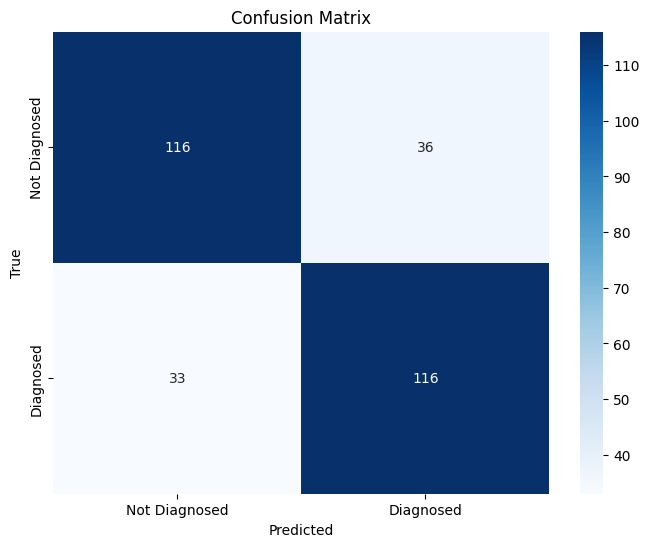

The amount of correctly predicted individuals, who did not have the condition (True negative): 116
The amount of correctly predicted individuals, who did have the condition (True positive): 116
The amount of incorrectly predicted individuals, predicted to have the condition, but actually did not (False positive): 36
The amount of incorrectly predicted individuals, predicted to not have the condition, but actually did (False negative): 33


In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Convert predictions to binary (0 or 1) based on a 0.5 threshold
binary_predictions = np.where(predictions > 0.5, 1, 0)

# Generate the confusion matrix
cm = confusion_matrix(y_test, binary_predictions)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Diagnosed', 'Diagnosed'], yticklabels=['Not Diagnosed', 'Diagnosed'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Extracting true negatives, false positives, false negatives, and true positives
tn, fp, fn, tp = cm.ravel()

# Printing the breakdown
print(f"The amount of correctly predicted individuals, who did not have the condition (True negative): {tn}")
print(f"The amount of correctly predicted individuals, who did have the condition (True positive): {tp}")
print(f"The amount of incorrectly predicted individuals, predicted to have the condition, but actually did not (False positive): {fp}")
print(f"The amount of incorrectly predicted individuals, predicted to not have the condition, but actually did (False negative): {fn}")

In [58]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

# Classification Report
cr = classification_report(y_test, binary_predictions)
print("\nClassification Report:")
print(cr)


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       152
           1       0.76      0.78      0.77       149

    accuracy                           0.77       301
   macro avg       0.77      0.77      0.77       301
weighted avg       0.77      0.77      0.77       301



#### MLFFNN/MLP - 70/30 split with downsampled data

In [59]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

X = balanced_data_downsampled.drop(['Diagnosis', 'AgeGroup'], axis=1)  # Features
y = balanced_data_downsampled['Diagnosis']  # Target variable

# Normalise the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Build the Neural Network Model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),  # Added layer with 32 neurons
    Dense(64, activation='relu'),  # Added layer with 64 neurons
    Dense(32, activation='relu'),  # Added another layer with 32 neurons
    Dense(16, activation='relu'),  # Original layer
    Dense(1, activation='sigmoid')
])

# Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Model
model.fit(X_train, y_train, epochs=150, validation_split=0.3)

# Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

# Model Predictions
predictions = model.predict(X_test) > 0.5

Epoch 1/150


c:\Users\kenar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4830 - loss: 0.7018 - val_accuracy: 0.4715 - val_loss: 0.6957
Epoch 2/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6156 - loss: 0.6727 - val_accuracy: 0.5095 - val_loss: 0.6930
Epoch 3/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6418 - loss: 0.6500 - val_accuracy: 0.5506 - val_loss: 0.6839
Epoch 4/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6406 - loss: 0.6257 - val_accuracy: 0.5411 - val_loss: 0.6880
Epoch 5/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6883 - loss: 0.5783 - val_accuracy: 0.5570 - val_loss: 0.6916
Epoch 6/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7216 - loss: 0.5479 - val_accuracy: 0.6519 - val_loss: 0.6661
Epoch 7/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7479 - loss: 0.4928 - val_accuracy: 0.6646 - val_loss: 0.6693
Epoch 8/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8067 - loss: 0.4041 - val_accuracy: 0.6772 - val_loss: 0.6

##### Evaluation of model 70/30 - DS

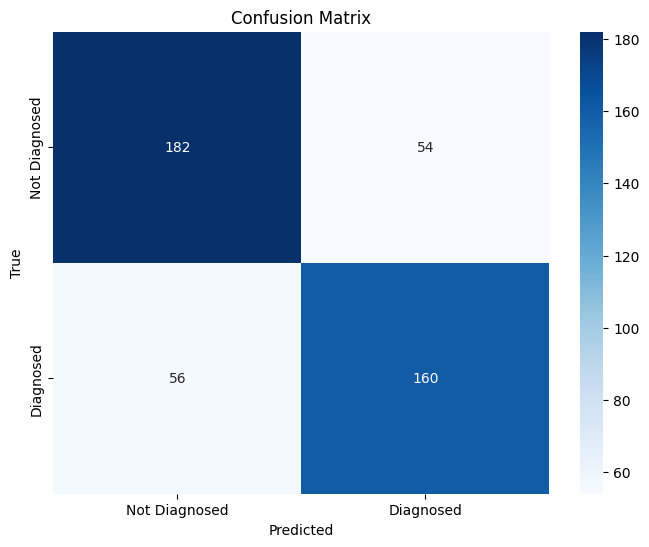

The amount of correctly predicted individuals, who did not have the condition (True negative): 182
The amount of correctly predicted individuals, who did have the condition (True positive): 160
The amount of incorrectly predicted individuals, predicted to have the condition, but actually did not (False positive): 54
The amount of incorrectly predicted individuals, predicted to not have the condition, but actually did (False negative): 56


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Convert predictions to binary (0 or 1) based on a 0.5 threshold
binary_predictions = np.where(predictions > 0.5, 1, 0)

# Generate the confusion matrix
cm = confusion_matrix(y_test, binary_predictions)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Diagnosed', 'Diagnosed'], yticklabels=['Not Diagnosed', 'Diagnosed'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Extracting true negatives, false positives, false negatives, and true positives
tn, fp, fn, tp = cm.ravel()

# Printing the breakdown
print(f"The amount of correctly predicted individuals, who did not have the condition (True negative): {tn}")
print(f"The amount of correctly predicted individuals, who did have the condition (True positive): {tp}")
print(f"The amount of incorrectly predicted individuals, predicted to have the condition, but actually did not (False positive): {fp}")
print(f"The amount of incorrectly predicted individuals, predicted to not have the condition, but actually did (False negative): {fn}")

In [61]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

# Classification Report
cr = classification_report(y_test, binary_predictions)
print("\nClassification Report:")
print(cr)



Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.77      0.77       236
           1       0.75      0.74      0.74       216

    accuracy                           0.76       452
   macro avg       0.76      0.76      0.76       452
weighted avg       0.76      0.76      0.76       452



#### MLFFNN/MLP - 80/20 split with upsampled data

In [62]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

X = balanced_data_smote.drop(['Diagnosis'], axis=1)  # Features
y = balanced_data_smote['Diagnosis']  # Target variable

# Normalise the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the Neural Network Model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),  # Added layer with 32 neurons
    Dense(64, activation='relu'),  # Added layer with 64 neurons
    Dense(32, activation='relu'),  # Added another layer with 32 neurons
    Dense(16, activation='relu'),  # Original layer
    Dense(1, activation='sigmoid')
])

# Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Model
model.fit(X_train, y_train, epochs=150, validation_split=0.2)

# Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

# Model Predictions
predictions = model.predict(X_test) > 0.5

Epoch 1/150


c:\Users\kenar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5354 - loss: 0.6907 - val_accuracy: 0.7064 - val_loss: 0.6490
Epoch 2/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6790 - loss: 0.6334 - val_accuracy: 0.7479 - val_loss: 0.5374
Epoch 3/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7361 - loss: 0.5279 - val_accuracy: 0.7839 - val_loss: 0.4869
Epoch 4/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8004 - loss: 0.4628 - val_accuracy: 0.8061 - val_loss: 0.4426
Epoch 5/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8275 - loss: 0.4224 - val_accuracy: 0.8199 - val_loss: 0.4293
Epoch 6/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8558 - loss: 0.3661 - val_accuracy: 0.8116 - val_loss: 0.4245
Epoch 7/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8652 - loss: 0.3443 - val_accuracy: 0.8144 - val_loss: 0.4277
Epoch 8/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8714 - loss: 0.3375 - val_accuracy: 0.8089 - val_loss: 0.4

##### Evaluation of model 80/20 - US

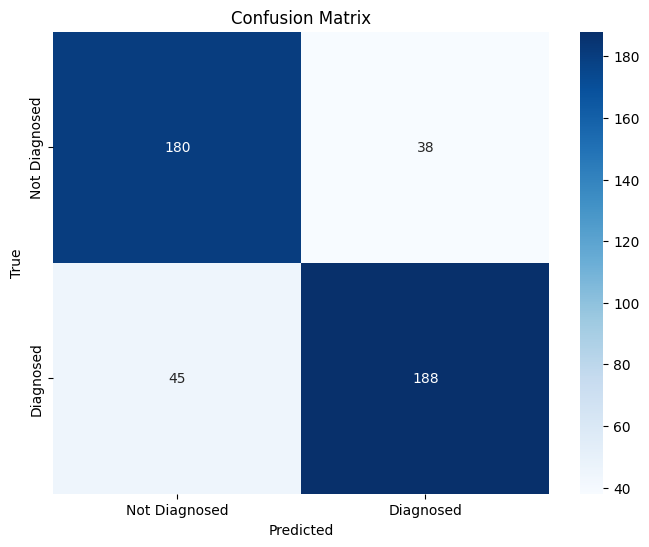

The amount of correctly predicted individuals, who did not have the condition (True negative): 180
The amount of correctly predicted individuals, who did have the condition (True positive): 188
The amount of incorrectly predicted individuals, predicted to have the condition, but actually did not (False positive): 38
The amount of incorrectly predicted individuals, predicted to not have the condition, but actually did (False negative): 45


In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Convert predictions to binary (0 or 1) based on a 0.5 threshold
binary_predictions = np.where(predictions > 0.5, 1, 0)

# Generate the confusion matrix
cm = confusion_matrix(y_test, binary_predictions)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Diagnosed', 'Diagnosed'], yticklabels=['Not Diagnosed', 'Diagnosed'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Extracting true negatives, false positives, false negatives, and true positives
tn, fp, fn, tp = cm.ravel()

# Printing the breakdown
print(f"The amount of correctly predicted individuals, who did not have the condition (True negative): {tn}")
print(f"The amount of correctly predicted individuals, who did have the condition (True positive): {tp}")
print(f"The amount of incorrectly predicted individuals, predicted to have the condition, but actually did not (False positive): {fp}")
print(f"The amount of incorrectly predicted individuals, predicted to not have the condition, but actually did (False negative): {fn}")

In [64]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

# Classification Report
cr = classification_report(y_test, binary_predictions)
print("\nClassification Report:")
print(cr)


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       218
           1       0.83      0.81      0.82       233

    accuracy                           0.82       451
   macro avg       0.82      0.82      0.82       451
weighted avg       0.82      0.82      0.82       451



#### MLFFNN/MLP - 70/30 split with upsampled data

In [65]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

X = balanced_data_smote.drop(['Diagnosis'], axis=1)  # Features
y = balanced_data_smote['Diagnosis']  # Target variable

# Normalise the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Build the Neural Network Model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),  # Added layer with 32 neurons
    Dense(64, activation='relu'),  # Added layer with 64 neurons
    Dense(32, activation='relu'),  # Added another layer with 32 neurons
    Dense(16, activation='relu'),  # Original layer
    Dense(1, activation='sigmoid')
])

# Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Model
model.fit(X_train, y_train, epochs=150, validation_split=0.3)

# Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

# Model Predictions
predictions = model.predict(X_test) > 0.5

Epoch 1/150


c:\Users\kenar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4953 - loss: 0.7012 - val_accuracy: 0.5696 - val_loss: 0.6848
Epoch 2/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5818 - loss: 0.6821 - val_accuracy: 0.6076 - val_loss: 0.6698
Epoch 3/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6327 - loss: 0.6562 - val_accuracy: 0.6477 - val_loss: 0.6337
Epoch 4/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7123 - loss: 0.5976 - val_accuracy: 0.6983 - val_loss: 0.5769
Epoch 5/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7463 - loss: 0.5406 - val_accuracy: 0.7384 - val_loss: 0.5315
Epoch 6/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7958 - loss: 0.4636 - val_accuracy: 0.7511 - val_loss: 0.4984
Epoch 7/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8063 - loss: 0.4245 - val_accuracy: 0.7700 - val_loss: 0.4790
Epoch 8/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8220 - loss: 0.4002 - val_accuracy: 0.7869 - val_loss: 0.4

##### Evalluation of model 70/30 - US

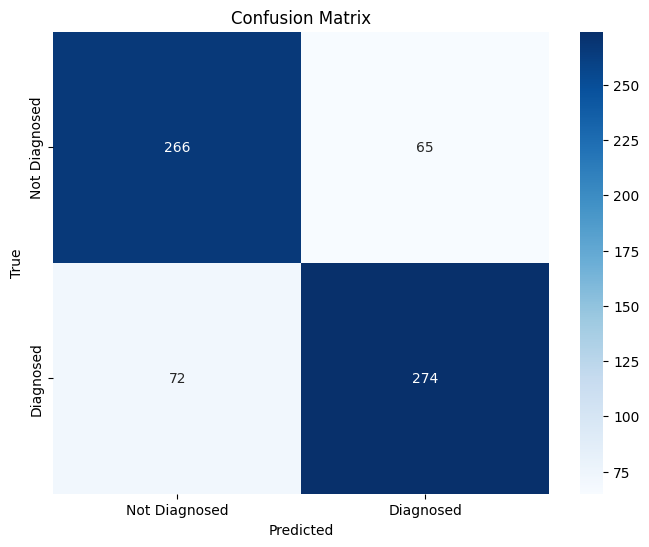

The amount of correctly predicted individuals, who did not have the condition (True negative): 266
The amount of correctly predicted individuals, who did have the condition (True positive): 274
The amount of incorrectly predicted individuals, predicted to have the condition, but actually did not (False positive): 65
The amount of incorrectly predicted individuals, predicted to not have the condition, but actually did (False negative): 72


In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Convert predictions to binary (0 or 1) based on a 0.5 threshold
binary_predictions = np.where(predictions > 0.5, 1, 0)

# Generate the confusion matrix
cm = confusion_matrix(y_test, binary_predictions)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Diagnosed', 'Diagnosed'], yticklabels=['Not Diagnosed', 'Diagnosed'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Extracting true negatives, false positives, false negatives, and true positives
tn, fp, fn, tp = cm.ravel()

# Printing the breakdown
print(f"The amount of correctly predicted individuals, who did not have the condition (True negative): {tn}")
print(f"The amount of correctly predicted individuals, who did have the condition (True positive): {tp}")
print(f"The amount of incorrectly predicted individuals, predicted to have the condition, but actually did not (False positive): {fp}")
print(f"The amount of incorrectly predicted individuals, predicted to not have the condition, but actually did (False negative): {fn}")

In [67]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

# Classification Report
cr = classification_report(y_test, binary_predictions)
print("\nClassification Report:")
print(cr)


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       331
           1       0.81      0.79      0.80       346

    accuracy                           0.80       677
   macro avg       0.80      0.80      0.80       677
weighted avg       0.80      0.80      0.80       677



### Conclusion: DNN

Every time after running the models the one with the highest accuracy is `The 80/20 - train/test split with the upsampled dataset` once again. It fluctuates between 77%~80%, which is not bad, however it is not satisfactory. Also, the confusion matrixes do indicate that there is some problems with the distinction

# **Phase 4**

## Conclusion of the project


The goal of this project was to develop an application capable of indicating whether certain features suggest a person has diabetes. This could be implemented as a phone application. Patients might encounter this application during a doctor's appointment following a blood test. The doctor would recommend installing the app and provide instructions on its use.

The app would offer information about diabetes, including its causes and treatments, which would be particularly useful for individuals in a pre-diabetic condition. Additionally, it would feature a section reminding users of the proper usage of the app.

Users would input characteristics such as age, BMI, smoking status, and family history of diabetes. They would then track their blood sugar using a monitoring device that can be connected to the mobile application, allowing the results to be saved on the phone. The app would keep a record of previous blood sugar readings and display them on a dashboard, providing transparency to the user. This feature would also enable both the patient and the doctor to monitor the effectiveness of the treatment.

If the system detects a significant spike in blood sugar levels, it would notify the user with a message like: "Your results suggest there might be a problem. It would be a good idea to see a doctor!" This gentle warning indicates a potential issue without causing immediate alarm. However, if the warning appears let us say at least three consecutive times, it would be advisable to contact a doctor. Conversely, if the results are normal, the message "Everything seems all right!" would reassure the patient.

There are guidelines when talking about the creation of such an application, especially with the help of Artificial Intelligence. These regulations are issued by the World Health Organisation (WHO) and ensure that the patients' safety is guaranteed and that there aren't any misscalculations creating such a system. It includes princples such as

 - Protecting human autonomy
 - Promoting human well-being and safety and the public interest 
 - Ensuring transparency, explainability and intelligibility
 - Fostering responsibility and accountability
 - Ensuring inclusiveness and equity
 - Promoting AI that is responsive and sustainable

With these guidelines, the developers grasp the gravity of the situation and gain a clearer understanding of the legal requirements they must adhere to. One significant example is ensuring transparency, explainability, and intelligibility. Providing clear information about the decisions made by the application can greatly enhance user trust and increase the responsibility of the engineers and doctors involved in its development and use. This approach fosters confidence in the application and supports its ongoing improvement.

An application utilizing a model like ours would be highly effective in raising awareness about diabetes, informing users on how to improve their health and prevent the disease, and most importantly, scheduling timely doctor appointments to reduce health risks. It would be particularly beneficial for individuals in a pre-diabetic state, keeping them informed about the seriousness of their condition.

Developing such an application carries significant responsibility, as it must adhere to the ethical guidelines issued by the WHO. Developers must ensure the app meets these standards, doctors must responsibly recommend and inform patients about its use, and the patients must diligently track their blood sugar and take necessary steps to prevent diabetes.

In conclusion, creating an application that impacts human health and potentially saves lives requires careful consideration of many factors. However, if implemented correctly, it could significantly benefit society by helping the preventtion of the development of diabetes.

### Conclusion: ML

The goal of this project is to predict whether a person shows indications of being diabetic. This involves developing a binary classification model, where '1' indicates a prediction of diabetes and '0' indicates no diabetes. With this objective in mind, decision to use a Gradient Boosting Classifier (GBC) was taken, due to its robustness and suitability for our project.

After selecting the GBC, I consulted with our Machine Learning teacher, Priyanka Darbari. She suggested exploring the integration of a Deep Neural Network (DNN) model, prompting further research into deep learning. Based on this research, it was decided to implement a Multilayer Perceptron (MLP). Other models, such as Recurrent Neural Networks (RNNs) and Convolutional Neural Networks (CNNs), were deemed unsuitable for our dataset and project requirements.

During the preprocessing and modeling phase, various approaches were tested, including upsampling, downsampling, and different training/testing splits (80/20 and 70/30). 

The MLP model did not achieve satisfactory results, likely due to the limited amount of data available. DNN models typically perform better with larger datasets, as they require more data to effectively learn and train themselves. We also employed various evaluation methods such as confusion matrices and classification reports. Ultimately, the best-performing model was the GBC with an 80/20 split and upsampled data, achieving approximately 89% accuracy, which is acceptable. Keeping this in mind, this is why it is the only model which is also shown to have inference for testing.


### Conclusion: DAIA


The data for this project was sourced from Kaggle (link to the dataset). During the download process, we encountered a notable issue: the dataset provided no information regarding its origin, only stating that it was confidential. While it is understandable to maintain the confidentiality of doctors' names and patients' personal information to avoid privacy breaches, it would be reasonable to disclose the institution or organization from which the data was collected. In many cases, even when data is confidential, its source is still credited, as seen in other examples:

- https://www.kaggle.com/datasets/whenamancodes/predict-diabities 

- https://www.kaggle.com/datasets/imtkaggleteam/diabetes 

The absence of such information raised concerns about the dataset's legitimacy.
Despite these initial concerns, thorough preliminary research and Exploratory Data Analysis (EDA) were conducted. The dataset proved to be valuable, containing diverse information that was beneficial for developing a predictive system. Through initial research on diabetes, I identified the main factors contributing to the development of this chronic disease and decided to explore these factors in more detail, as well as some factors which were just considered as possibly correlated.


Once the work on the data began, my suspicions were raised, prompting me to discuss the issue with my Data Analytics & Investigative Analysis teacher, Hans Konings. During our conversation on June 21st, he provided valuable insights, explaining that sometimes datasets are specifically selected and that this one might not necessarily be fake. However, we both acknowledged that the peculiarities in the data were quite concerning.

Over the following weekend, I delved deeper into the dataset, focusing on the features necessary for a project like a diabetes estimator. I developed a model using these features, which proved to be successful. Despite this, I believe the data might not be just 'very specifically selected'; rather, it seems likely that the dataset was fabricated by someone with a good understanding of the subject.
